In [ ]:
# STEP 1: INSTALL REQUIRED PACKAGES (Run this first in Colab)
# ============================================
print("📦 Installing required packages...")
!pip install plotly -q
!pip install kaleido -q
print("✅ Packages installed successfully!\n")

📦 Installing required packages...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.0/69.0 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 5.6 MB/s eta 0:00:00
✅ Packages installed successfully!



In [ ]:
# STEP 2: IMPORT LIBRARIES
# ============================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
from datetime import datetime
from collections import Counter
from google.colab import files
import io

warnings.filterwarnings('ignore')
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

print("✅ All libraries imported successfully!")
print("="*60)

✅ All libraries imported successfully!


In [ ]:
# STEP 3: UPLOAD YOUR DATASET
# ============================================
print("\n📤 UPLOAD YOUR CSV FILE")
print("="*60)
print("Please click the 'Choose Files' button below and upload 'ai_job_market.csv'")

uploaded = files.upload()

# Get the filename
filename = list(uploaded.keys())[0]
print(f"\n✅ File '{filename}' uploaded successfully!")


📤 UPLOAD YOUR CSV FILE
Please click the 'Choose Files' button below and upload 'ai_job_market.csv'


Saving ai_job_market.csv to ai_job_market (1).csv

✅ File 'ai_job_market (1).csv' uploaded successfully!


In [ ]:
# STEP 4: LOAD AND EXPLORE DATA
# ============================================
df = pd.read_csv(io.BytesIO(uploaded[filename]))

print("\n📊 DATASET OVERVIEW")
print("="*60)
print(f"Dataset Shape: {df.shape[0]} rows × {df.shape[1]} columns\n")
print("First 5 rows:")
print(df.head())
print(f"\n📋 Column Information:")
print(df.info())
print(f"\n📈 Basic Statistics:")
print(df.describe())
print(f"\n❓ Missing Values:")
missing = df.isnull().sum()
print(missing[missing > 0] if missing.sum() > 0 else "No missing values!")


📊 DATASET OVERVIEW
Dataset Shape: 2000 rows × 12 columns

First 5 rows:
   job_id              company_name    industry                 job_title  \
0       1           Foster and Sons  Healthcare              Data Analyst   
1       2   Boyd, Myers and Ramirez        Tech  Computer Vision Engineer   
2       3                  King Inc        Tech          Quant Researcher   
3       4  Cooper, Archer and Lynch        Tech        AI Product Manager   
4       5                  Hall LLC     Finance            Data Scientist   

                                     skills_required experience_level  \
0  NumPy, Reinforcement Learning, PyTorch, Scikit...              Mid   
1                    Scikit-learn, CUDA, SQL, Pandas           Senior   
2          MLflow, FastAPI, Azure, PyTorch, SQL, GCP            Entry   
3       Scikit-learn, C++, Pandas, LangChain, AWS, R              Mid   
4                    Excel, Keras, SQL, Hugging Face           Senior   

  employment_type        

In [ ]:
# STEP 4: LOAD AND EXPLORE DATA
# ============================================
df = pd.read_csv(io.BytesIO(uploaded[filename]))

print("\n📊 DATASET OVERVIEW")
print("="*60)
print(f"Dataset Shape: {df.shape[0]} rows × {df.shape[1]} columns\n")
print("First 5 rows:")
print(df.head())
print(f"\n📋 Column Information:")
print(df.info())
print(f"\n📈 Basic Statistics:")
print(df.describe())
print(f"\n❓ Missing Values:")
missing = df.isnull().sum()
print(missing[missing > 0] if missing.sum() > 0 else "No missing values!")


📊 DATASET OVERVIEW
Dataset Shape: 2000 rows × 12 columns

First 5 rows:
   job_id              company_name    industry                 job_title  \
0       1           Foster and Sons  Healthcare              Data Analyst   
1       2   Boyd, Myers and Ramirez        Tech  Computer Vision Engineer   
2       3                  King Inc        Tech          Quant Researcher   
3       4  Cooper, Archer and Lynch        Tech        AI Product Manager   
4       5                  Hall LLC     Finance            Data Scientist   

                                     skills_required experience_level  \
0  NumPy, Reinforcement Learning, PyTorch, Scikit...              Mid   
1                    Scikit-learn, CUDA, SQL, Pandas           Senior   
2          MLflow, FastAPI, Azure, PyTorch, SQL, GCP            Entry   
3       Scikit-learn, C++, Pandas, LangChain, AWS, R              Mid   
4                    Excel, Keras, SQL, Hugging Face           Senior   

  employment_type        

In [ ]:
# STEP 5: DATA CLEANING & FEATURE ENGINEERING
# ============================================
print("\n\n🧹 DATA CLEANING & FEATURE ENGINEERING")
print("="*60)

df_clean = df.copy()

# Convert dates
df_clean['posted_date'] = pd.to_datetime(df_clean['posted_date'])
df_clean['year'] = df_clean['posted_date'].dt.year
df_clean['month'] = df_clean['posted_date'].dt.month
df_clean['month_year'] = df_clean['posted_date'].dt.to_period('M')

# Parse salary information
def extract_salary_info(salary_str):
    if pd.isna(salary_str):
        return pd.Series([np.nan, np.nan, np.nan])
    parts = str(salary_str).split('-')
    if len(parts) == 2:
        min_sal = float(parts[0])
        max_sal = float(parts[1])
        avg_sal = (min_sal + max_sal) / 2
        return pd.Series([min_sal, max_sal, avg_sal])
    return pd.Series([np.nan, np.nan, np.nan])

df_clean[['salary_min', 'salary_max', 'salary_avg']] = df_clean['salary_range_usd'].apply(extract_salary_info)

# Count skills and tools
def count_skills(skills_str):
    if pd.isna(skills_str):
        return 0
    return len([s.strip() for s in str(skills_str).split(',')])

df_clean['num_skills_required'] = df_clean['skills_required'].apply(count_skills)
df_clean['num_tools_preferred'] = df_clean['tools_preferred'].apply(count_skills)

# Extract location info
def extract_location_info(location_str):
    if pd.isna(location_str):
        return np.nan
    parts = str(location_str).split(',')
    return parts[-1].strip() if len(parts) > 1 else np.nan

df_clean['country_code'] = df_clean['location'].apply(extract_location_info)

print("✅ Data cleaning completed!")
print(f"   • Parsed {df_clean['salary_avg'].notna().sum()} salary records")
print(f"   • Calculated skill and tool counts")
print(f"   • Extracted temporal and location features")



🧹 DATA CLEANING & FEATURE ENGINEERING
✅ Data cleaning completed!
   • Parsed 2000 salary records
   • Calculated skill and tool counts
   • Extracted temporal and location features


In [ ]:
# STEP 6: KEY METRICS DASHBOARD
# ============================================
print("\n\n📊 KEY METRICS DASHBOARD")
print("="*60)

total_jobs = len(df_clean)
avg_salary = df_clean['salary_avg'].mean()
median_salary = df_clean['salary_avg'].median()
unique_companies = df_clean['company_name'].nunique()
unique_industries = df_clean['industry'].nunique()
unique_roles = df_clean['job_title'].nunique()
avg_skills = df_clean['num_skills_required'].mean()

print(f"🎯 Total AI Job Postings: {total_jobs:,}")
print(f"💼 Unique Companies: {unique_companies:,}")
print(f"🏭 Industries: {unique_industries}")
print(f"👔 Job Roles: {unique_roles}")
print(f"💰 Average Salary: ${avg_salary:,.2f}")
print(f"📊 Median Salary: ${median_salary:,.2f}")
print(f"🎓 Avg Skills Required: {avg_skills:.1f}")



📊 KEY METRICS DASHBOARD
🎯 Total AI Job Postings: 2,000
💼 Unique Companies: 1,909
🏭 Industries: 7
👔 Job Roles: 8
💰 Average Salary: $123,040.00
📊 Median Salary: $123,202.75
🎓 Avg Skills Required: 4.5


In [ ]:
# STEP 7: COMPREHENSIVE VISUALIZATIONS
# ============================================
exp_order = ['Entry', 'Mid', 'Senior']

# Extract skills and tools
all_skills = []
for skills_str in df_clean['skills_required'].dropna():
    skills = [s.strip() for s in str(skills_str).split(',')]
    all_skills.extend(skills)
skill_counts = Counter(all_skills)
top_skills = dict(skill_counts.most_common(20))

all_tools = []
for tools_str in df_clean['tools_preferred'].dropna():
    tools = [t.strip() for t in str(tools_str).split(',')]
    all_tools.extend(tools)
tool_counts = Counter(all_tools)
top_tools = dict(tool_counts.most_common(15))


📈 Creating Visualization 1: Job Distribution...
✅ Saved: 1_job_distribution.png


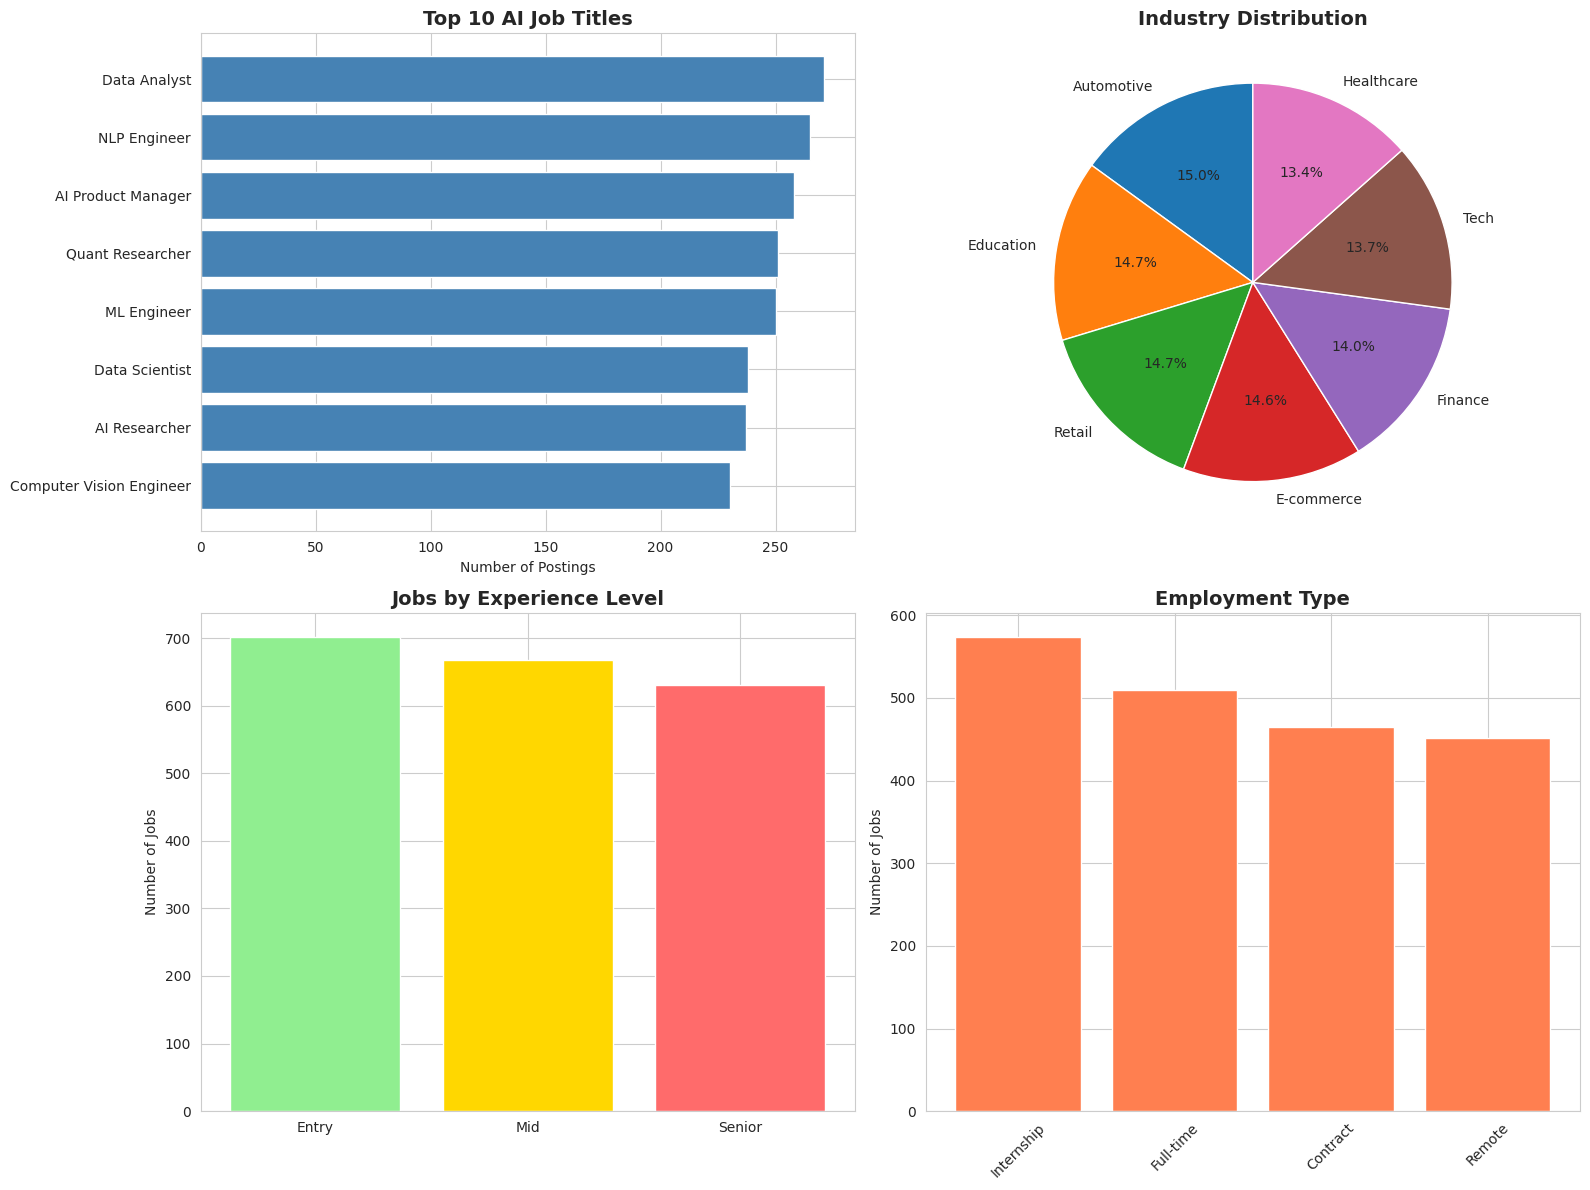

In [ ]:
# VISUALIZATION 1: JOB DISTRIBUTION
# ============================================
print("\n📈 Creating Visualization 1: Job Distribution...")

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Top job titles
top_jobs = df_clean['job_title'].value_counts().head(10)
axes[0, 0].barh(range(len(top_jobs)), top_jobs.values, color='steelblue')
axes[0, 0].set_yticks(range(len(top_jobs)))
axes[0, 0].set_yticklabels(top_jobs.index)
axes[0, 0].set_xlabel('Number of Postings')
axes[0, 0].set_title('Top 10 AI Job Titles', fontsize=14, fontweight='bold')
axes[0, 0].invert_yaxis()

# Industry distribution
industry_counts = df_clean['industry'].value_counts().head(8)
axes[0, 1].pie(industry_counts.values, labels=industry_counts.index, autopct='%1.1f%%', startangle=90)
axes[0, 1].set_title('Industry Distribution', fontsize=14, fontweight='bold')

# Experience level
exp_counts = df_clean['experience_level'].value_counts().reindex(exp_order, fill_value=0)
axes[1, 0].bar(exp_counts.index, exp_counts.values, color=['#90EE90', '#FFD700', '#FF6B6B'])
axes[1, 0].set_ylabel('Number of Jobs')
axes[1, 0].set_title('Jobs by Experience Level', fontsize=14, fontweight='bold')

# Employment type
emp_counts = df_clean['employment_type'].value_counts()
axes[1, 1].bar(emp_counts.index, emp_counts.values, color='coral')
axes[1, 1].set_ylabel('Number of Jobs')
axes[1, 1].set_title('Employment Type', fontsize=14, fontweight='bold')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('1_job_distribution.png', dpi=300, bbox_inches='tight')
print("✅ Saved: 1_job_distribution.png")
plt.show()


💰 Creating Visualization 2: Salary Analysis...
✅ Saved: 2_salary_analysis.png


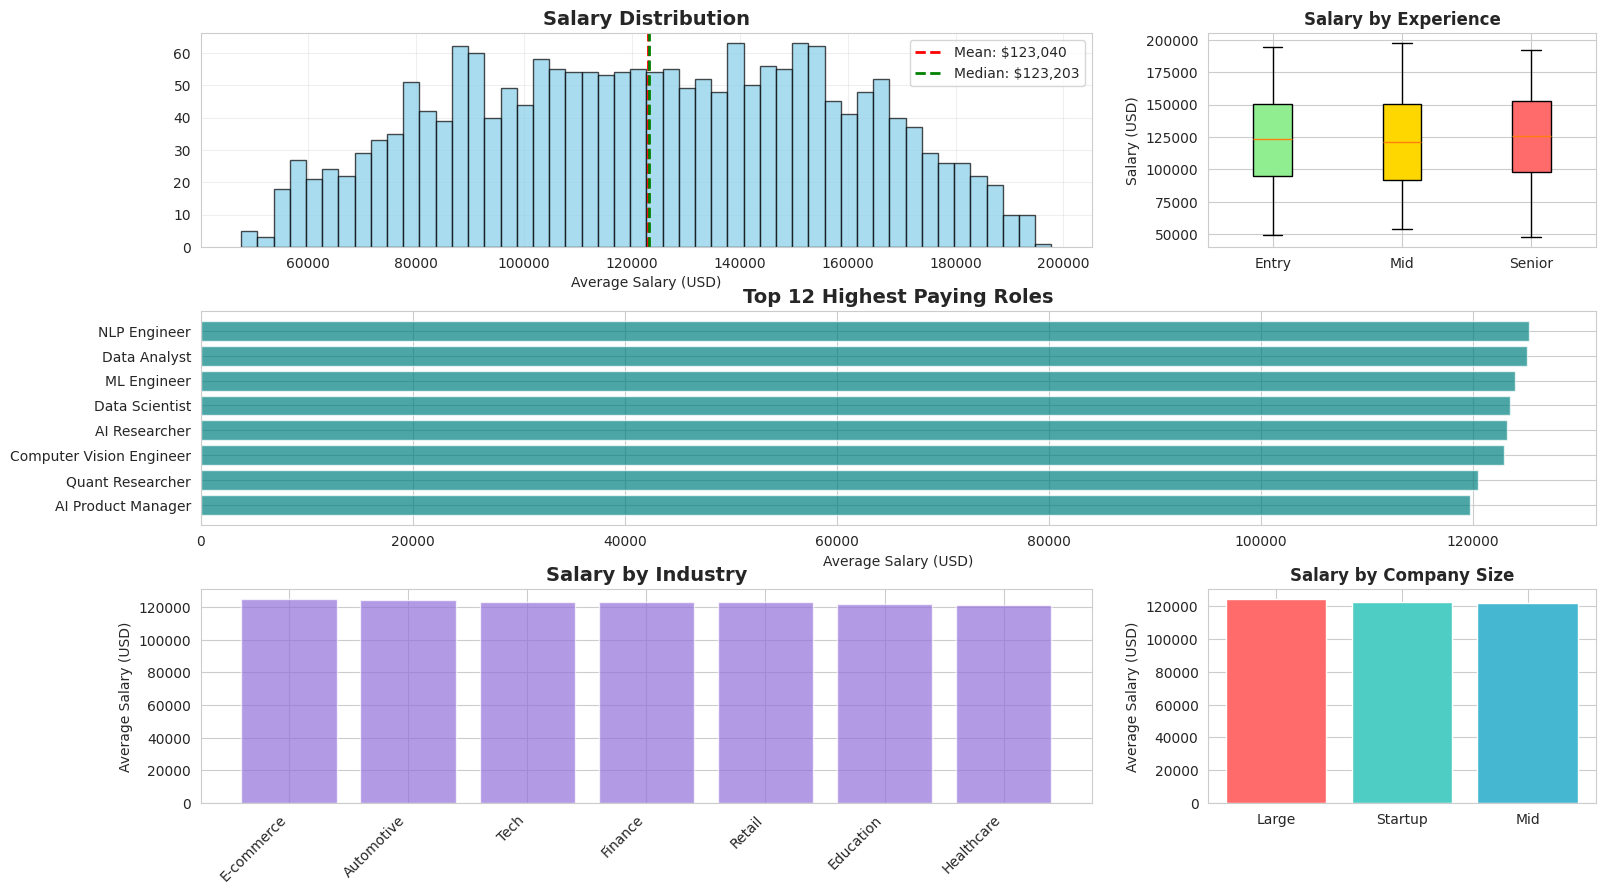

In [ ]:
# VISUALIZATION 2: SALARY ANALYSIS
# ============================================
print("\n💰 Creating Visualization 2: Salary Analysis...")

fig = plt.figure(figsize=(18, 10))
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

# Salary distribution
ax1 = fig.add_subplot(gs[0, :2])
ax1.hist(df_clean['salary_avg'].dropna(), bins=50, color='skyblue', edgecolor='black', alpha=0.7)
ax1.axvline(avg_salary, color='red', linestyle='--', linewidth=2, label=f"Mean: ${avg_salary:,.0f}")
ax1.axvline(median_salary, color='green', linestyle='--', linewidth=2, label=f"Median: ${median_salary:,.0f}")
ax1.set_xlabel('Average Salary (USD)')
ax1.set_title('Salary Distribution', fontsize=14, fontweight='bold')
ax1.legend()
ax1.grid(alpha=0.3)

# Box plot by experience
ax2 = fig.add_subplot(gs[0, 2])
exp_data = [df_clean[df_clean['experience_level'] == exp]['salary_avg'].dropna() for exp in exp_order]
bp = ax2.boxplot(exp_data, labels=exp_order, patch_artist=True)
for patch, color in zip(bp['boxes'], ['#90EE90', '#FFD700', '#FF6B6B']):
    patch.set_facecolor(color)
ax2.set_ylabel('Salary (USD)')
ax2.set_title('Salary by Experience', fontsize=12, fontweight='bold')

# Top paying roles
ax3 = fig.add_subplot(gs[1, :])
salary_by_job = df_clean.groupby('job_title')['salary_avg'].mean().sort_values(ascending=False).head(12)
ax3.barh(range(len(salary_by_job)), salary_by_job.values, color='teal', alpha=0.7)
ax3.set_yticks(range(len(salary_by_job)))
ax3.set_yticklabels(salary_by_job.index)
ax3.set_xlabel('Average Salary (USD)')
ax3.set_title('Top 12 Highest Paying Roles', fontsize=14, fontweight='bold')
ax3.invert_yaxis()

# By industry
ax4 = fig.add_subplot(gs[2, :2])
salary_by_industry = df_clean.groupby('industry')['salary_avg'].mean().sort_values(ascending=False)
ax4.bar(range(len(salary_by_industry)), salary_by_industry.values, color='mediumpurple', alpha=0.7)
ax4.set_xticks(range(len(salary_by_industry)))
ax4.set_xticklabels(salary_by_industry.index, rotation=45, ha='right')
ax4.set_ylabel('Average Salary (USD)')
ax4.set_title('Salary by Industry', fontsize=14, fontweight='bold')

# By company size
ax5 = fig.add_subplot(gs[2, 2])
salary_by_size = df_clean.groupby('company_size')['salary_avg'].mean().sort_values(ascending=False)
ax5.bar(salary_by_size.index, salary_by_size.values, color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
ax5.set_ylabel('Average Salary (USD)')
ax5.set_title('Salary by Company Size', fontsize=12, fontweight='bold')

plt.savefig('2_salary_analysis.png', dpi=300, bbox_inches='tight')
print("✅ Saved: 2_salary_analysis.png")
plt.show()


🎓 Creating Visualization 3: Skills & Tools...
✅ Saved: 3_skills_tools.png


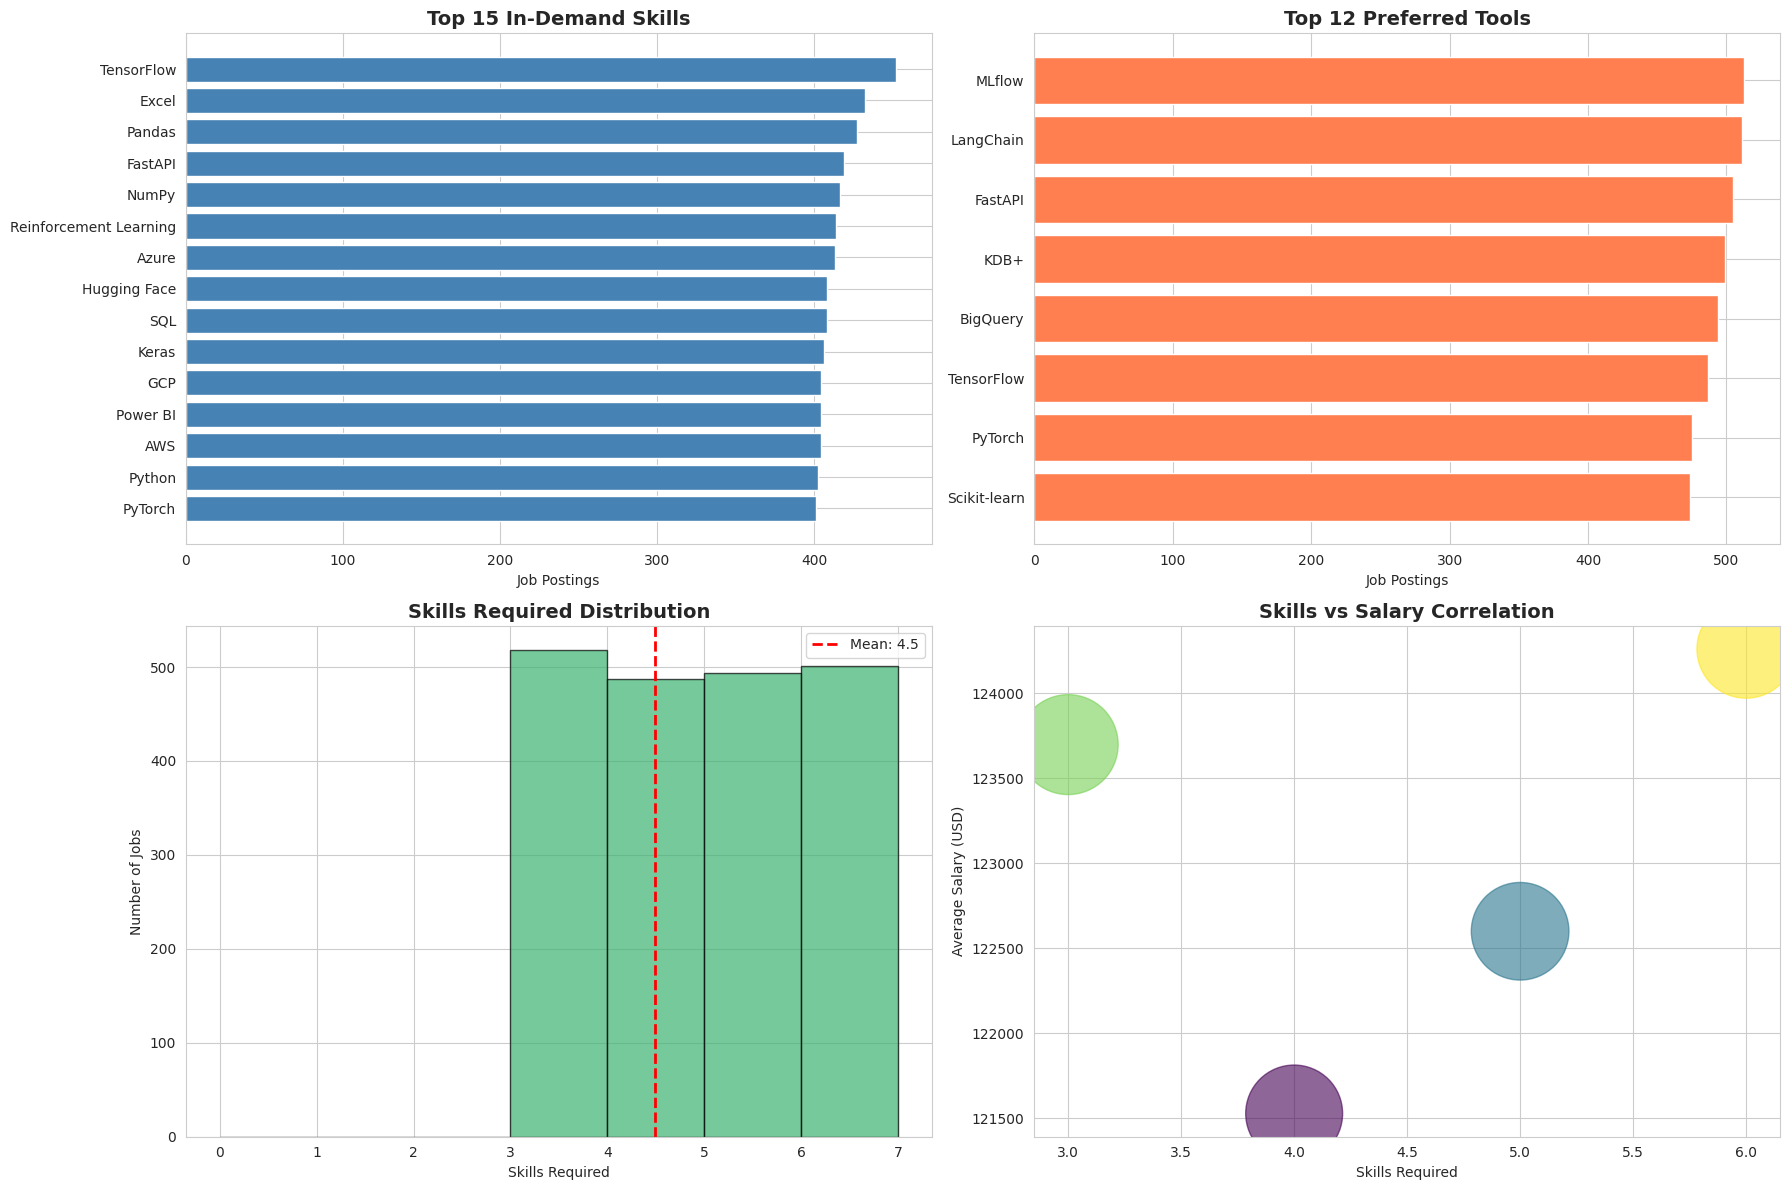

In [ ]:
# VISUALIZATION 3: SKILLS & TOOLS
# ============================================
print("\n🎓 Creating Visualization 3: Skills & Tools...")

fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Top skills
skills_df = pd.DataFrame(list(top_skills.items()), columns=['Skill', 'Count']).sort_values('Count', ascending=True)
axes[0, 0].barh(skills_df['Skill'].tail(15), skills_df['Count'].tail(15), color='steelblue')
axes[0, 0].set_xlabel('Job Postings')
axes[0, 0].set_title('Top 15 In-Demand Skills', fontsize=14, fontweight='bold')

# Top tools
tools_df = pd.DataFrame(list(top_tools.items()), columns=['Tool', 'Count']).sort_values('Count', ascending=True)
axes[0, 1].barh(tools_df['Tool'].tail(12), tools_df['Count'].tail(12), color='coral')
axes[0, 1].set_xlabel('Job Postings')
axes[0, 1].set_title('Top 12 Preferred Tools', fontsize=14, fontweight='bold')

# Skills distribution
axes[1, 0].hist(df_clean['num_skills_required'], bins=range(0, df_clean['num_skills_required'].max()+2),
                color='mediumseagreen', edgecolor='black', alpha=0.7)
axes[1, 0].axvline(avg_skills, color='red', linestyle='--', linewidth=2, label=f"Mean: {avg_skills:.1f}")
axes[1, 0].set_xlabel('Skills Required')
axes[1, 0].set_ylabel('Number of Jobs')
axes[1, 0].set_title('Skills Required Distribution', fontsize=14, fontweight='bold')
axes[1, 0].legend()

# Skills vs Salary
skill_salary = df_clean.groupby('num_skills_required')['salary_avg'].agg(['mean', 'count'])
skill_salary = skill_salary[skill_salary['count'] >= 5]
axes[1, 1].scatter(skill_salary.index, skill_salary['mean'], s=skill_salary['count']*10,
                   alpha=0.6, c=skill_salary['mean'], cmap='viridis')
axes[1, 1].set_xlabel('Skills Required')
axes[1, 1].set_ylabel('Average Salary (USD)')
axes[1, 1].set_title('Skills vs Salary Correlation', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('3_skills_tools.png', dpi=300, bbox_inches='tight')
print("✅ Saved: 3_skills_tools.png")
plt.show()


📅 Creating Visualization 4: Time Series Analysis...
✅ Saved: 4_time_series.png


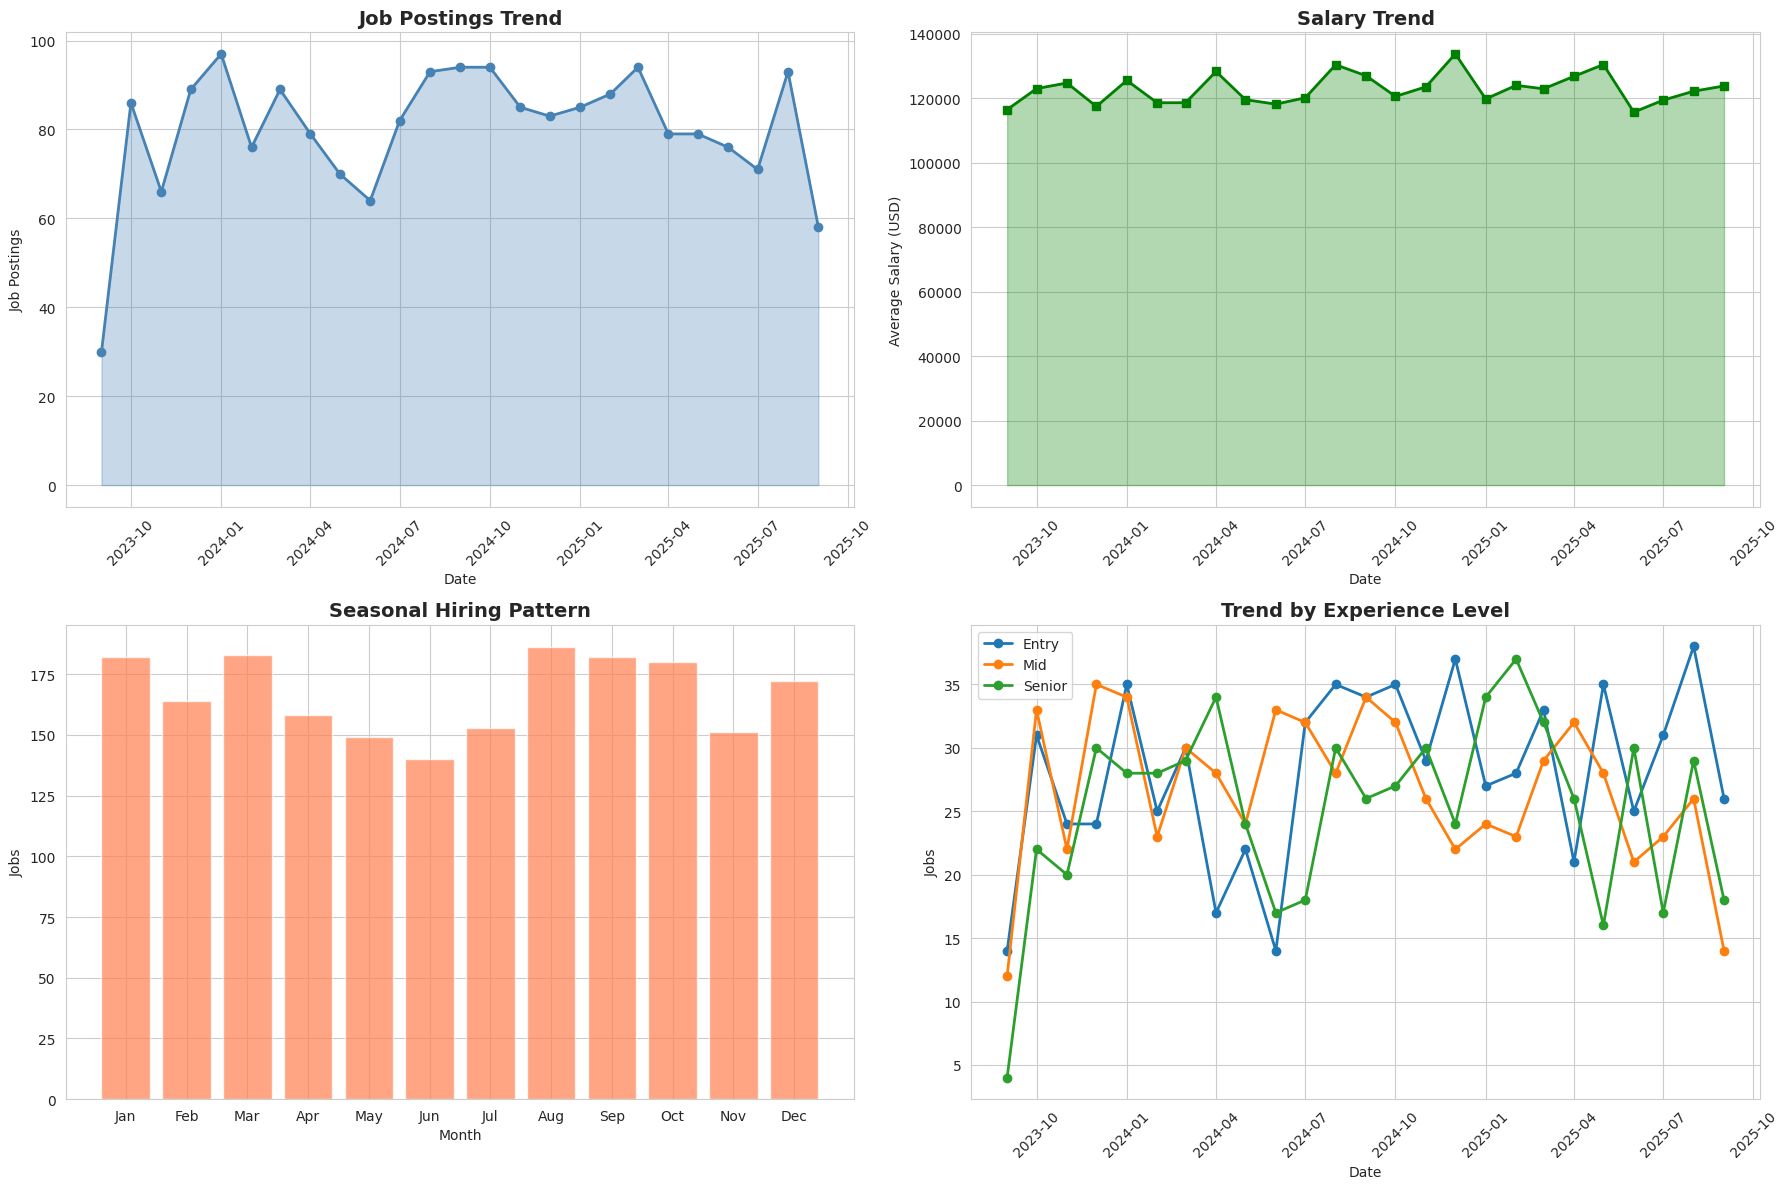

In [ ]:
# VISUALIZATION 4: TIME SERIES
# ============================================
print("\n📅 Creating Visualization 4: Time Series Analysis...")

fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Jobs over time
monthly_jobs = df_clean.groupby('month_year').size()
monthly_jobs.index = monthly_jobs.index.to_timestamp()
axes[0, 0].plot(monthly_jobs.index, monthly_jobs.values, marker='o', linewidth=2, color='steelblue')
axes[0, 0].fill_between(monthly_jobs.index, monthly_jobs.values, alpha=0.3, color='steelblue')
axes[0, 0].set_xlabel('Date')
axes[0, 0].set_ylabel('Job Postings')
axes[0, 0].set_title('Job Postings Trend', fontsize=14, fontweight='bold')
axes[0, 0].tick_params(axis='x', rotation=45)

# Salary trend
monthly_salary = df_clean.groupby('month_year')['salary_avg'].mean()
monthly_salary.index = monthly_salary.index.to_timestamp()
axes[0, 1].plot(monthly_salary.index, monthly_salary.values, marker='s', linewidth=2, color='green')
axes[0, 1].fill_between(monthly_salary.index, monthly_salary.values, alpha=0.3, color='green')
axes[0, 1].set_xlabel('Date')
axes[0, 1].set_ylabel('Average Salary (USD)')
axes[0, 1].set_title('Salary Trend', fontsize=14, fontweight='bold')
axes[0, 1].tick_params(axis='x', rotation=45)

# Monthly pattern
monthly_pattern = df_clean.groupby('month').size()
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
axes[1, 0].bar(range(1, 13), [monthly_pattern.get(i, 0) for i in range(1, 13)], color='coral', alpha=0.7)
axes[1, 0].set_xticks(range(1, 13))
axes[1, 0].set_xticklabels(month_names)
axes[1, 0].set_xlabel('Month')
axes[1, 0].set_ylabel('Jobs')
axes[1, 0].set_title('Seasonal Hiring Pattern', fontsize=14, fontweight='bold')

# Experience trend
exp_time = df_clean.groupby(['month_year', 'experience_level']).size().unstack(fill_value=0)
exp_time.index = exp_time.index.to_timestamp()
for exp in exp_order:
    if exp in exp_time.columns:
        axes[1, 1].plot(exp_time.index, exp_time[exp], marker='o', label=exp, linewidth=2)
axes[1, 1].set_xlabel('Date')
axes[1, 1].set_ylabel('Jobs')
axes[1, 1].set_title('Trend by Experience Level', fontsize=14, fontweight='bold')
axes[1, 1].legend()
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('4_time_series.png', dpi=300, bbox_inches='tight')
print("✅ Saved: 4_time_series.png")
plt.show()


🌍 Creating Visualization 5: Geographic & Company Analysis...
✅ Saved: 5_geographic_company.png


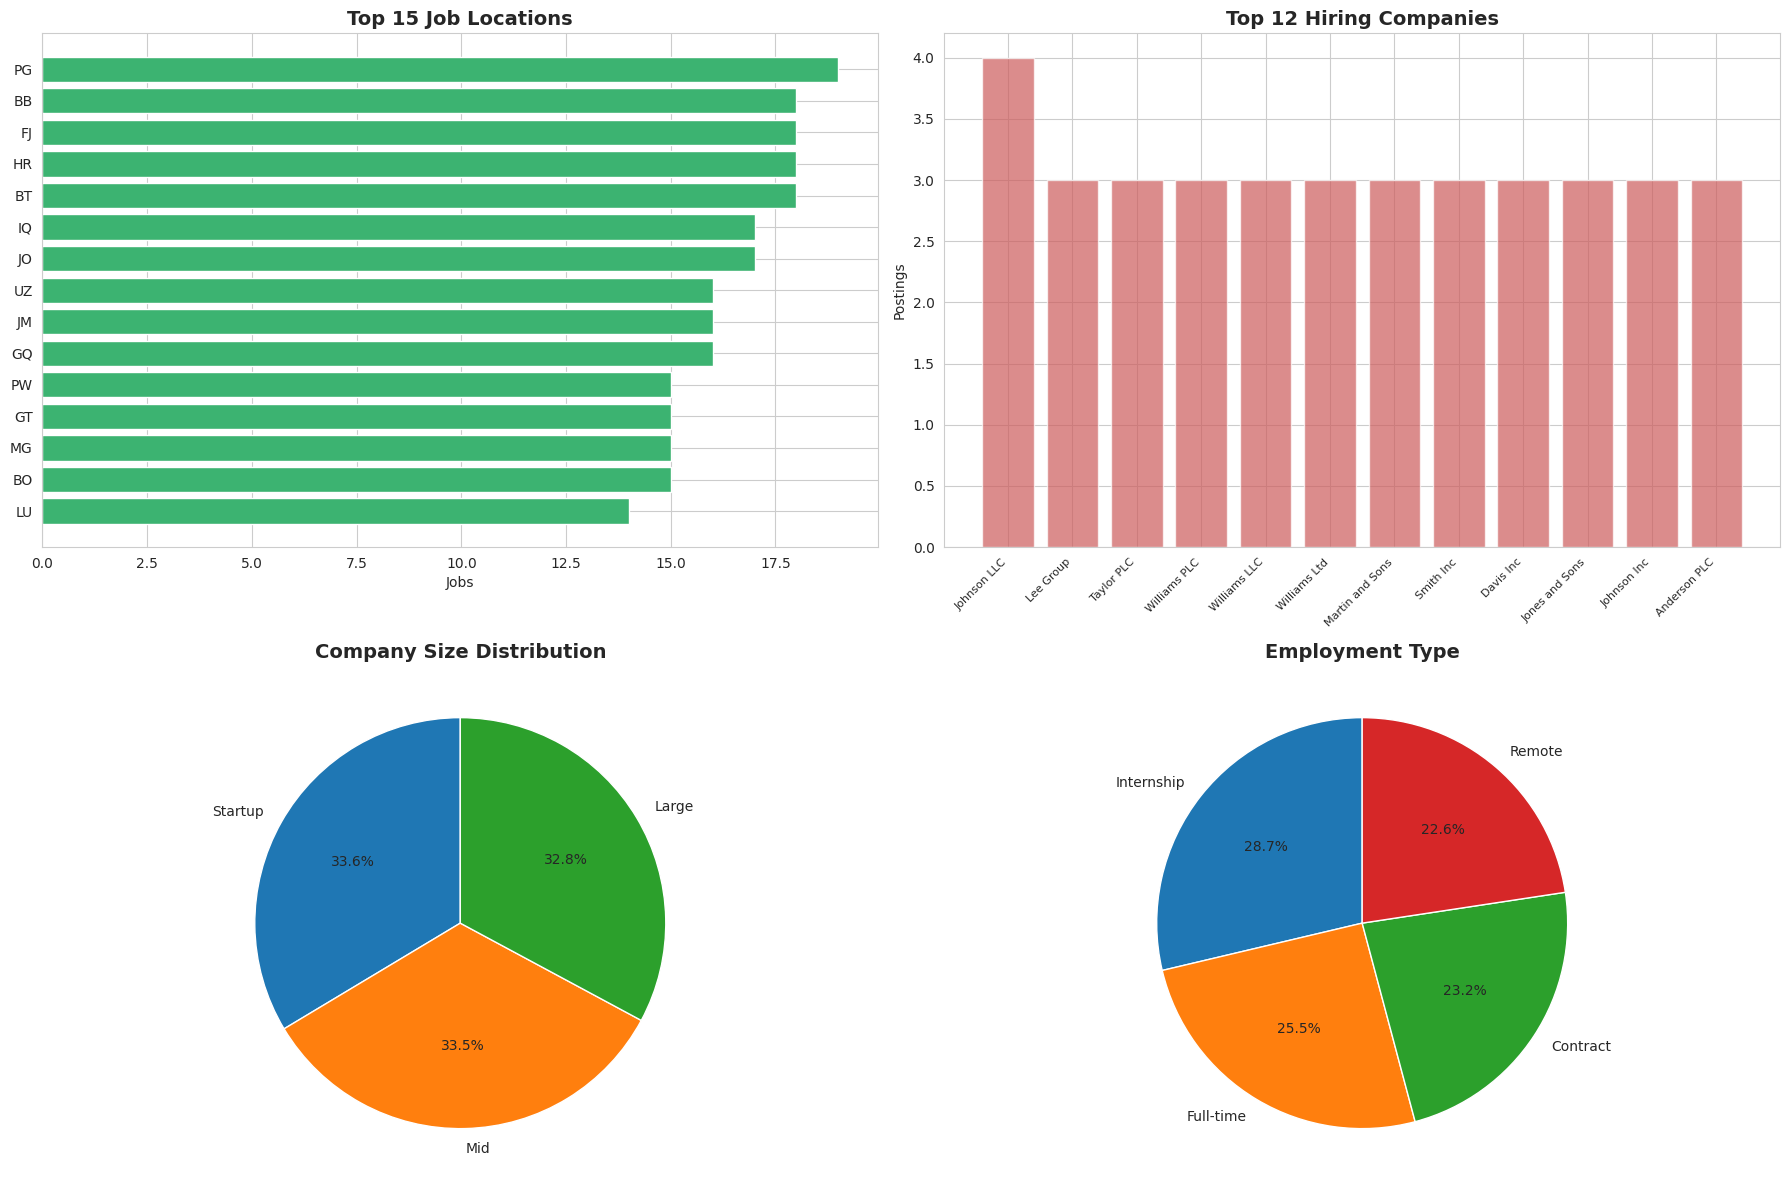

In [ ]:
# VISUALIZATION 5: GEOGRAPHIC & COMPANY
# ============================================
print("\n🌍 Creating Visualization 5: Geographic & Company Analysis...")

fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Top locations
top_locations = df_clean['country_code'].value_counts().head(15)
axes[0, 0].barh(range(len(top_locations)), top_locations.values, color='mediumseagreen')
axes[0, 0].set_yticks(range(len(top_locations)))
axes[0, 0].set_yticklabels(top_locations.index)
axes[0, 0].set_xlabel('Jobs')
axes[0, 0].set_title('Top 15 Job Locations', fontsize=14, fontweight='bold')
axes[0, 0].invert_yaxis()

# Top companies
top_companies = df_clean['company_name'].value_counts().head(12)
axes[0, 1].bar(range(len(top_companies)), top_companies.values, color='indianred', alpha=0.7)
axes[0, 1].set_xticks(range(len(top_companies)))
axes[0, 1].set_xticklabels(top_companies.index, rotation=45, ha='right', fontsize=8)
axes[0, 1].set_ylabel('Postings')
axes[0, 1].set_title('Top 12 Hiring Companies', fontsize=14, fontweight='bold')

# Company size
size_counts = df_clean['company_size'].value_counts()
axes[1, 0].pie(size_counts.values, labels=size_counts.index, autopct='%1.1f%%', startangle=90)
axes[1, 0].set_title('Company Size Distribution', fontsize=14, fontweight='bold')

# Employment type
remote_dist = df_clean['employment_type'].value_counts()
axes[1, 1].pie(remote_dist.values, labels=remote_dist.index, autopct='%1.1f%%', startangle=90)
axes[1, 1].set_title('Employment Type', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('5_geographic_company.png', dpi=300, bbox_inches='tight')
print("✅ Saved: 5_geographic_company.png")
plt.show()


In [ ]:
# INTERACTIVE PLOTLY VISUALIZATIONS
# ============================================
print("\n🎨 Creating Interactive Plotly Dashboards...")

# Interactive salary comparison
fig1 = px.box(df_clean, x='experience_level', y='salary_avg', color='experience_level',
             title='Interactive Salary by Experience Level',
             category_orders={'experience_level': exp_order})
fig1.update_layout(showlegend=False, height=500)
fig1.show()

# Interactive time series
fig2 = go.Figure()
fig2.add_trace(go.Scatter(x=monthly_jobs.index, y=monthly_jobs.values,
                         mode='lines+markers', name='Job Postings',
                         fill='tonexty', line=dict(color='steelblue', width=2)))
fig2.update_layout(title='Interactive Job Postings Timeline',
                   xaxis_title='Date', yaxis_title='Number of Jobs',
                   height=500)
fig2.show()

# Interactive 3D scatter
df_plot = df_clean[['num_skills_required', 'salary_avg', 'experience_level']].dropna()
fig3 = px.scatter_3d(df_plot, x='num_skills_required', y='salary_avg', z='experience_level',
                    color='experience_level', title='3D: Skills vs Salary vs Experience',
                    category_orders={'experience_level': exp_order})
fig3.update_layout(height=600)
fig3.show()


🎨 Creating Interactive Plotly Dashboards...


In [ ]:
# KEY INSIGHTS REPORT
# ============================================
print("\n\n" + "="*60)
print("📋 KEY INSIGHTS SUMMARY")
print("="*60)

most_common_role = df_clean['job_title'].value_counts().index[0]
highest_paying = df_clean.groupby('job_title')['salary_avg'].mean().sort_values(ascending=False).head(1)
top_3_skills = list(top_skills.keys())[:3]
top_3_locations = df_clean['country_code'].value_counts().head(3)

print(f"\n1. Most In-Demand Role: {most_common_role}")
print(f"2. Highest Paying Role: {highest_paying.index[0]} (${highest_paying.values[0]:,.2f})")
print(f"3. Top 3 Skills: {', '.join(top_3_skills)}")
print(f"4. Top Location: {top_3_locations.index[0]} ({top_3_locations.values[0]} jobs)")
print(f"5. Remote Work: {(df_clean['employment_type'] == 'Remote').sum() / len(df_clean) * 100:.1f}%")

print("\n" + "="*60)
print("✅ AI JOB TRENDS DASHBOARD COMPLETE!")
print("="*60)
print("\n📊 All visualizations generated successfully!")
print("💾 Download the PNG files from the files panel on the left")



📋 KEY INSIGHTS SUMMARY

1. Most In-Demand Role: Data Analyst
2. Highest Paying Role: NLP Engineer ($125,307.55)
3. Top 3 Skills: TensorFlow, Excel, Pandas
4. Top Location: PG (19 jobs)
5. Remote Work: 22.6%

✅ AI JOB TRENDS DASHBOARD COMPLETE!

📊 All visualizations generated successfully!
💾 Download the PNG files from the files panel on the left


In [ ]:
# STEP 1: INSTALL & IMPORT LIBRARIES
# ============================================
print("📦 Installing required packages...")
!pip install plotly kaleido scikit-learn -q
print("✅ Packages installed!\n")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
from collections import Counter
from google.colab import files
import io

📦 Installing required packages...
✅ Packages installed!



In [ ]:
# Machine Learning
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import (
    mean_squared_error, r2_score, mean_absolute_error,
    accuracy_score, classification_report, confusion_matrix,
    precision_recall_fscore_support, roc_curve, roc_auc_score,
    precision_recall_curve
)

warnings.filterwarnings('ignore')
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 8)

print("✅ All libraries imported!\n")

✅ All libraries imported!



In [ ]:
# STEP 3: DATA PREPROCESSING
# ============================================
print("🧹 DATA PREPROCESSING")
print("="*60)

df_clean = df.copy()

# Convert dates
df_clean['posted_date'] = pd.to_datetime(df_clean['posted_date'])
df_clean['year'] = df_clean['posted_date'].dt.year
df_clean['month'] = df_clean['posted_date'].dt.month
df_clean['day_of_week'] = df_clean['posted_date'].dt.dayofweek
df_clean['quarter'] = df_clean['posted_date'].dt.quarter

# Parse salary
def extract_salary_info(salary_str):
    if pd.isna(salary_str):
        return pd.Series([np.nan, np.nan, np.nan])
    parts = str(salary_str).split('-')
    if len(parts) == 2:
        return pd.Series([float(parts[0]), float(parts[1]), (float(parts[0]) + float(parts[1])) / 2])
    return pd.Series([np.nan, np.nan, np.nan])

df_clean[['salary_min', 'salary_max', 'salary_avg']] = df_clean['salary_range_usd'].apply(extract_salary_info)
df_clean['salary_range_size'] = df_clean['salary_max'] - df_clean['salary_min']

# Count skills
def count_items(item_str):
    return 0 if pd.isna(item_str) else len([s.strip() for s in str(item_str).split(',')])

df_clean['num_skills_required'] = df_clean['skills_required'].apply(count_items)
df_clean['num_tools_preferred'] = df_clean['tools_preferred'].apply(count_items)
df_clean['total_requirements'] = df_clean['num_skills_required'] + df_clean['num_tools_preferred']

# Location
df_clean['country_code'] = df_clean['location'].apply(
    lambda x: x.split(',')[-1].strip() if pd.notna(x) and ',' in str(x) else np.nan
)

# Binary features
df_clean['is_remote'] = (df_clean['employment_type'] == 'Remote').astype(int)
df_clean['is_full_time'] = (df_clean['employment_type'] == 'Full-time').astype(int)
df_clean['is_large_company'] = (df_clean['company_size'] == 'Large').astype(int)

# Skill features
for skill in ['Python', 'SQL', 'PyTorch', 'TensorFlow', 'AWS', 'Azure', 'GCP']:
    df_clean[f'has_{skill.lower()}'] = df_clean['skills_required'].str.contains(
        skill, case=False, na=False).astype(int)

# Encode categoricals
le_industry = LabelEncoder()
le_job_title = LabelEncoder()
le_experience = LabelEncoder()
le_employment_type = LabelEncoder()
le_company_size = LabelEncoder()

df_clean['industry_encoded'] = le_industry.fit_transform(df_clean['industry'])
df_clean['job_title_encoded'] = le_job_title.fit_transform(df_clean['job_title'])
df_clean['experience_encoded'] = le_experience.fit_transform(df_clean['experience_level'])
df_clean['employment_type_encoded'] = le_employment_type.fit_transform(df_clean['employment_type'])
df_clean['company_size_encoded'] = le_company_size.fit_transform(df_clean['company_size'])

# Interaction features
df_clean['skills_x_experience'] = df_clean['num_skills_required'] * df_clean['experience_encoded']
df_clean['skills_x_industry'] = df_clean['num_skills_required'] * df_clean['industry_encoded']

df_ml = df_clean[df_clean['salary_avg'].notna()].copy()
print(f"✅ Preprocessing complete! ML dataset: {len(df_ml)} rows\n")

🧹 DATA PREPROCESSING
✅ Preprocessing complete! ML dataset: 2000 rows



In [ ]:
# STEP 4: PREPARE ML FEATURES
# ============================================
feature_cols = [
    'num_skills_required', 'num_tools_preferred', 'total_requirements',
    'industry_encoded', 'experience_encoded', 'employment_type_encoded',
    'company_size_encoded', 'is_remote', 'is_full_time', 'is_large_company',
    'year', 'month', 'quarter', 'day_of_week', 'salary_range_size',
    'skills_x_experience', 'skills_x_industry'
]
feature_cols.extend([col for col in df_ml.columns if col.startswith('has_')])

print(f"📊 Total ML features: {len(feature_cols)}\n")

📊 Total ML features: 24



In [ ]:
# STEP 5: MODEL 1 - SALARY PREDICTION
# ============================================
print("="*60)
print("🤖 MODEL 1: SALARY PREDICTION (REGRESSION)")
print("="*60)

X_salary = df_ml[feature_cols].fillna(0)
y_salary = df_ml['salary_avg']

X_train_sal, X_test_sal, y_train_sal, y_test_sal = train_test_split(
    X_salary, y_salary, test_size=0.2, random_state=42
)

# Random Forest
rf_regressor = RandomForestRegressor(n_estimators=100, max_depth=15, random_state=42, n_jobs=-1)
rf_regressor.fit(X_train_sal, y_train_sal)
y_pred_rf = rf_regressor.predict(X_test_sal)

rf_r2 = r2_score(y_test_sal, y_pred_rf)
rf_rmse = np.sqrt(mean_squared_error(y_test_sal, y_pred_rf))
rf_mae = mean_absolute_error(y_test_sal, y_pred_rf)

print(f"\n✅ Random Forest Results:")
print(f"   R² Score: {rf_r2:.4f} ({rf_r2*100:.2f}%)")
print(f"   RMSE: ${rf_rmse:,.2f}")
print(f"   MAE: ${rf_mae:,.2f}")

# Gradient Boosting
gb_regressor = GradientBoostingRegressor(n_estimators=100, max_depth=5, random_state=42)
gb_regressor.fit(X_train_sal, y_train_sal)
y_pred_gb = gb_regressor.predict(X_test_sal)

gb_r2 = r2_score(y_test_sal, y_pred_gb)
gb_rmse = np.sqrt(mean_squared_error(y_test_sal, y_pred_gb))

print(f"\n✅ Gradient Boosting Results:")
print(f"   R² Score: {gb_r2:.4f} ({gb_r2*100:.2f}%)")
print(f"   RMSE: ${gb_rmse:,.2f}")

feature_importance_sal = pd.DataFrame({
    'Feature': feature_cols,
    'Importance': rf_regressor.feature_importances_
}).sort_values('Importance', ascending=False)

print(f"\n📊 Top 5 Features:")
print(feature_importance_sal.head(5).to_string(index=False))

🤖 MODEL 1: SALARY PREDICTION (REGRESSION)

✅ Random Forest Results:
   R² Score: 0.1264 (12.64%)
   RMSE: $33,616.43
   MAE: $29,066.71

✅ Gradient Boosting Results:
   R² Score: 0.0865 (8.65%)
   RMSE: $34,375.24

📊 Top 5 Features:
            Feature  Importance
  salary_range_size    0.340474
              month    0.072119
  skills_x_industry    0.071830
        day_of_week    0.067367
skills_x_experience    0.046497


In [ ]:
# STEP 6: MODEL 2 - EXPERIENCE CLASSIFICATION
# ============================================
print("\n" + "="*60)
print("🤖 MODEL 2: EXPERIENCE LEVEL CLASSIFICATION")
print("="*60)

experience_feature_cols = [col for col in feature_cols if col != 'experience_encoded']
X_exp = df_ml[experience_feature_cols].fillna(0)
y_exp = df_ml['experience_level']

X_train_exp, X_test_exp, y_train_exp, y_test_exp = train_test_split(
    X_exp, y_exp, test_size=0.2, random_state=42, stratify=y_exp
)

# Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=15, random_state=42, n_jobs=-1)
rf_classifier.fit(X_train_exp, y_train_exp)
y_pred_rf_exp = rf_classifier.predict(X_test_exp)

rf_exp_accuracy = accuracy_score(y_test_exp, y_pred_rf_exp)
rf_exp_precision, rf_exp_recall, rf_exp_f1, _ = precision_recall_fscore_support(
    y_test_exp, y_pred_rf_exp, average='weighted'
)

print(f"\n✅ Random Forest Classifier:")
print(f"   Accuracy: {rf_exp_accuracy*100:.2f}%")
print(f"   Precision: {rf_exp_precision:.4f}")
print(f"   F1-Score: {rf_exp_f1:.4f}")

print(f"\n📋 Classification Report:")
print(classification_report(y_test_exp, y_pred_rf_exp))

feature_importance_exp = pd.DataFrame({
    'Feature': experience_feature_cols,
    'Importance': rf_classifier.feature_importances_
}).sort_values('Importance', ascending=False)

print(f"\n📊 Top 5 Features:")
print(feature_importance_exp.head(5).to_string(index=False))


🤖 MODEL 2: EXPERIENCE LEVEL CLASSIFICATION

✅ Random Forest Classifier:
   Accuracy: 100.00%
   Precision: 1.0000
   F1-Score: 1.0000

📋 Classification Report:
              precision    recall  f1-score   support

       Entry       1.00      1.00      1.00       140
         Mid       1.00      1.00      1.00       134
      Senior       1.00      1.00      1.00       126

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400


📊 Top 5 Features:
            Feature  Importance
skills_x_experience    0.639281
  salary_range_size    0.053265
              month    0.031042
  skills_x_industry    0.030952
        day_of_week    0.026713


In [ ]:
# STEP 7: MODEL 3 - REMOTE WORK PREDICTION
# ============================================
print("\n" + "="*60)
print("🤖 MODEL 3: REMOTE WORK PREDICTION")
print("="*60)

remote_feature_cols = [col for col in feature_cols if col not in ['is_remote', 'employment_type_encoded']]
X_remote = df_ml[remote_feature_cols].fillna(0)
y_remote = df_ml['is_remote']

X_train_rem, X_test_rem, y_train_rem, y_test_rem = train_test_split(
    X_remote, y_remote, test_size=0.2, random_state=42, stratify=y_remote
)

# Random Forest Classifier
rf_remote = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1)
rf_remote.fit(X_train_rem, y_train_rem)
y_pred_rf_rem = rf_remote.predict(X_test_rem)
y_pred_rf_rem_proba = rf_remote.predict_proba(X_test_rem)[:, 1]

rf_rem_accuracy = accuracy_score(y_test_rem, y_pred_rf_rem)
rf_rem_precision, rf_rem_recall, rf_rem_f1, _ = precision_recall_fscore_support(
    y_test_rem, y_pred_rf_rem, average='binary'
)
rf_rem_auc = roc_auc_score(y_test_rem, y_pred_rf_rem_proba)

print(f"\n✅ Random Forest Classifier:")
print(f"   Accuracy: {rf_rem_accuracy*100:.2f}%")
print(f"   Precision: {rf_rem_precision:.4f}")
print(f"   F1-Score: {rf_rem_f1:.4f}")
print(f"   ROC AUC: {rf_rem_auc:.4f}")

cm_rf = confusion_matrix(y_test_rem, y_pred_rf_rem)
print(f"\n📊 Confusion Matrix:")
print(f"   TN: {cm_rf[0,0]}, FP: {cm_rf[0,1]}")
print(f"   FN: {cm_rf[1,0]}, TP: {cm_rf[1,1]}")

feature_importance_rem = pd.DataFrame({
    'Feature': remote_feature_cols,
    'Importance': rf_remote.feature_importances_
}).sort_values('Importance', ascending=False)

print(f"\n📊 Top 5 Features:")
print(feature_importance_rem.head(5).to_string(index=False))


🤖 MODEL 3: REMOTE WORK PREDICTION

✅ Random Forest Classifier:
   Accuracy: 77.75%
   Precision: 1.0000
   F1-Score: 0.0220
   ROC AUC: 0.6655

📊 Confusion Matrix:
   TN: 310, FP: 0
   FN: 89, TP: 1

📊 Top 5 Features:
          Feature  Importance
salary_range_size    0.157964
     is_full_time    0.134166
skills_x_industry    0.075169
            month    0.073060
      day_of_week    0.065875



📊 Creating ML Visualizations...

✅ Saved: ml_dashboard.png


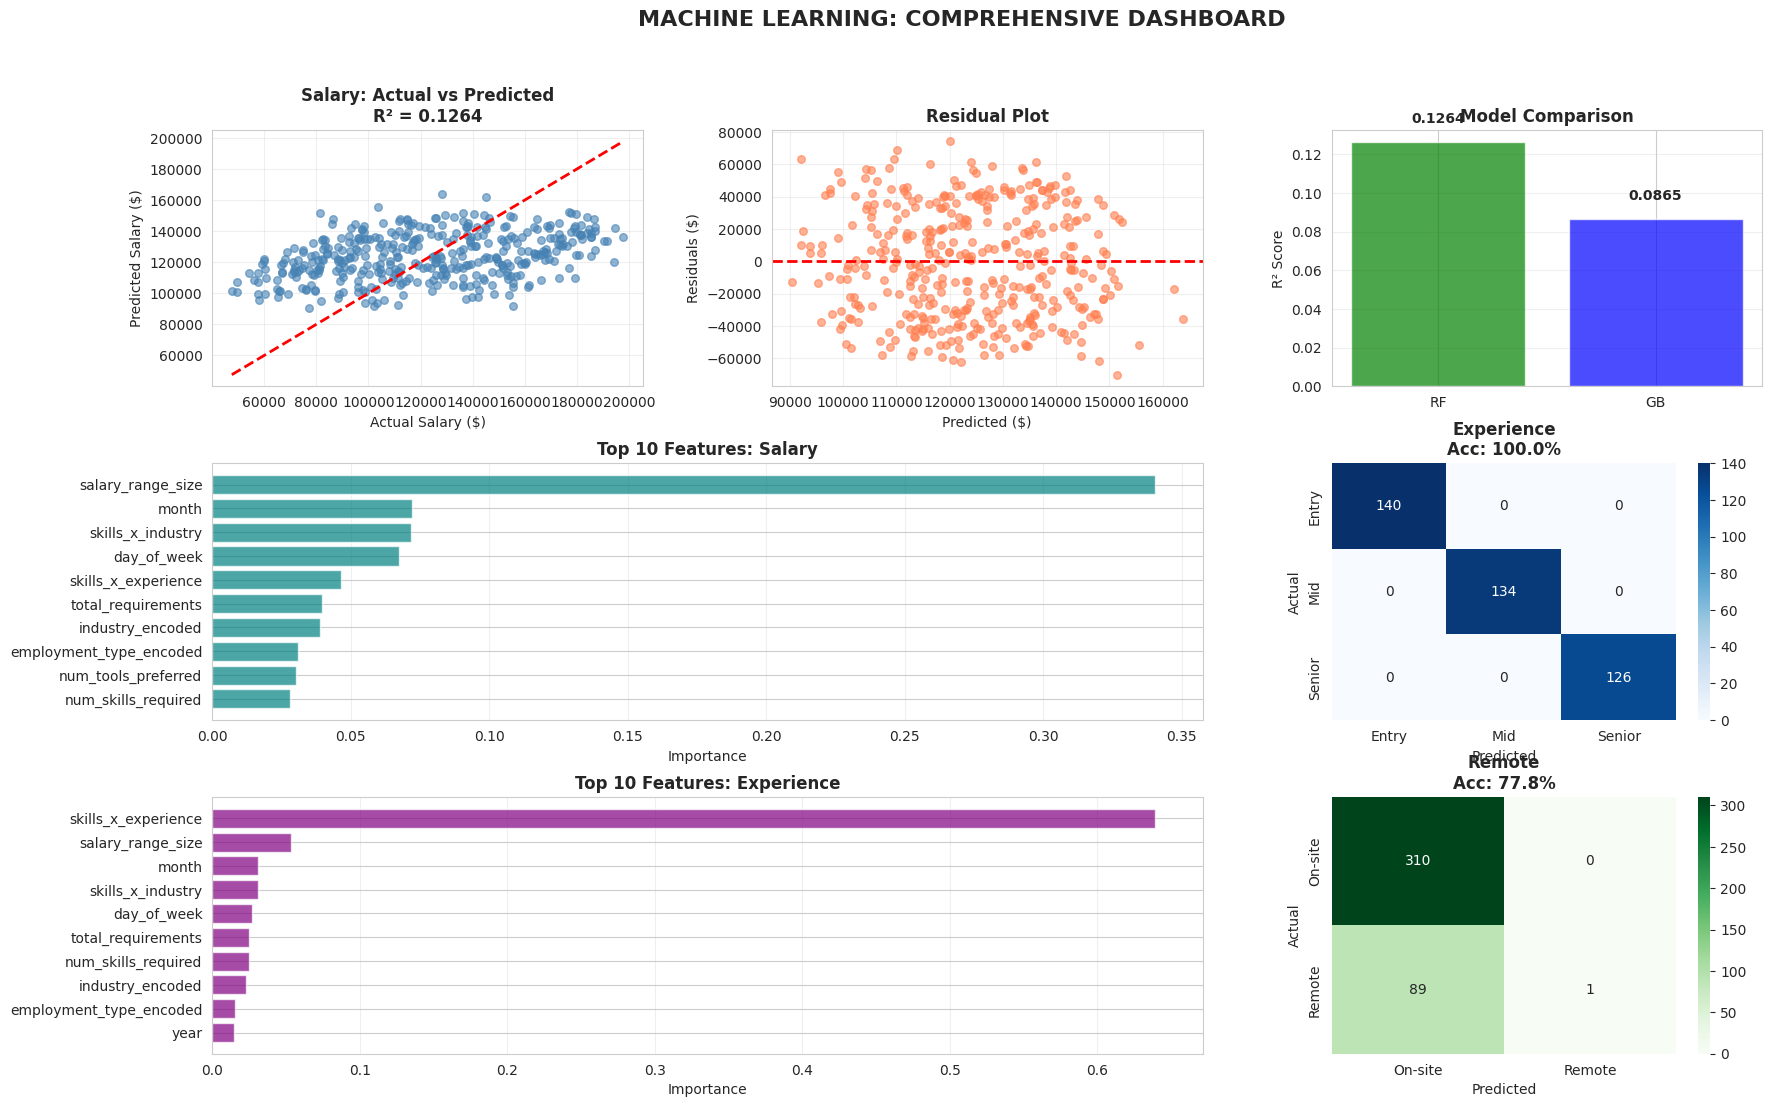

✅ Saved: ml_metrics.png


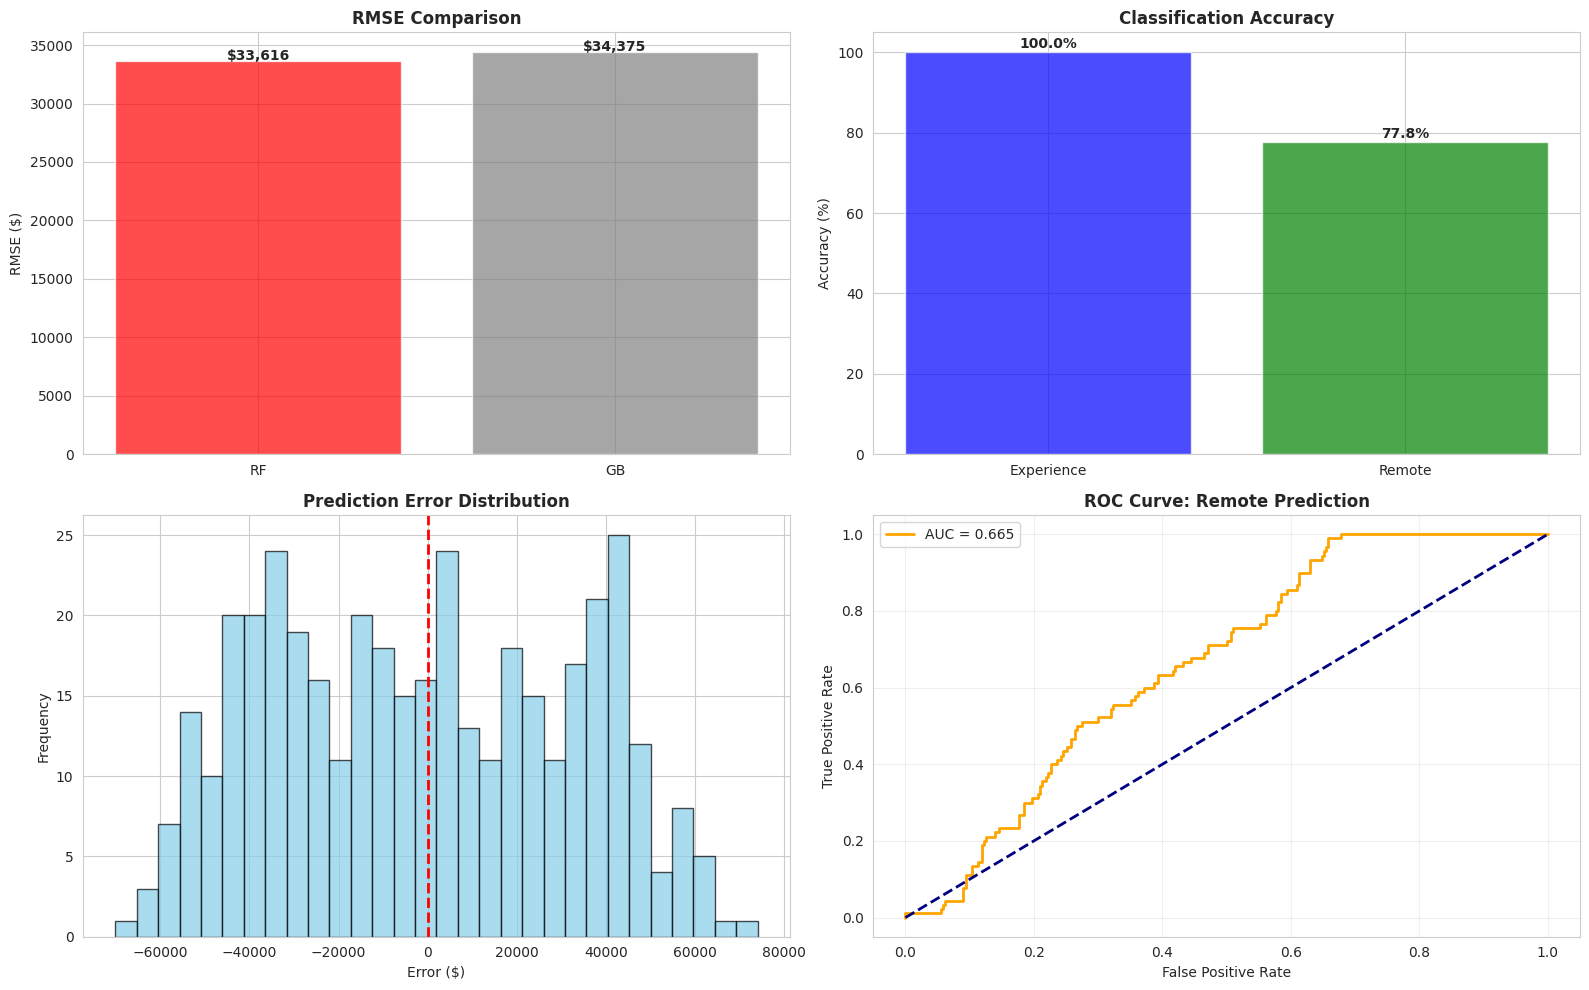


Creating interactive visualizations...


In [ ]:
# STEP 8: COMPREHENSIVE ML VISUALIZATIONS
# ============================================
print("\n📊 Creating ML Visualizations...\n")

# Visualization 1: Model Performance Dashboard
fig = plt.figure(figsize=(20, 12))
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

# Actual vs Predicted
ax1 = fig.add_subplot(gs[0, 0])
ax1.scatter(y_test_sal, y_pred_rf, alpha=0.6, s=30, color='steelblue')
ax1.plot([y_test_sal.min(), y_test_sal.max()], [y_test_sal.min(), y_test_sal.max()],
         'r--', lw=2)
ax1.set_xlabel('Actual Salary ($)')
ax1.set_ylabel('Predicted Salary ($)')
ax1.set_title(f'Salary: Actual vs Predicted\nR² = {rf_r2:.4f}', fontweight='bold')
ax1.grid(alpha=0.3)

# Residuals
ax2 = fig.add_subplot(gs[0, 1])
residuals = y_test_sal - y_pred_rf
ax2.scatter(y_pred_rf, residuals, alpha=0.6, s=30, color='coral')
ax2.axhline(y=0, color='r', linestyle='--', lw=2)
ax2.set_xlabel('Predicted ($)')
ax2.set_ylabel('Residuals ($)')
ax2.set_title('Residual Plot', fontweight='bold')
ax2.grid(alpha=0.3)

# Model Comparison
ax3 = fig.add_subplot(gs[0, 2])
models = ['RF', 'GB']
r2_scores = [rf_r2, gb_r2]
ax3.bar(models, r2_scores, color=['green', 'blue'], alpha=0.7)
ax3.set_ylabel('R² Score')
ax3.set_title('Model Comparison', fontweight='bold')
for i, v in enumerate(r2_scores):
    ax3.text(i, v+0.01, f'{v:.4f}', ha='center', fontweight='bold')
ax3.grid(axis='y', alpha=0.3)

# Feature Importance - Salary
ax4 = fig.add_subplot(gs[1, :2])
top_10 = feature_importance_sal.head(10)
ax4.barh(range(len(top_10)), top_10['Importance'], color='teal', alpha=0.7)
ax4.set_yticks(range(len(top_10)))
ax4.set_yticklabels(top_10['Feature'])
ax4.set_xlabel('Importance')
ax4.set_title('Top 10 Features: Salary', fontweight='bold')
ax4.invert_yaxis()
ax4.grid(axis='x', alpha=0.3)

# Confusion Matrix - Experience
ax5 = fig.add_subplot(gs[1, 2])
cm_exp = confusion_matrix(y_test_exp, y_pred_rf_exp)
sns.heatmap(cm_exp, annot=True, fmt='d', cmap='Blues', ax=ax5,
            xticklabels=sorted(y_exp.unique()),
            yticklabels=sorted(y_exp.unique()))
ax5.set_xlabel('Predicted')
ax5.set_ylabel('Actual')
ax5.set_title(f'Experience\nAcc: {rf_exp_accuracy*100:.1f}%', fontweight='bold')

# Feature Importance - Experience
ax6 = fig.add_subplot(gs[2, :2])
top_10_exp = feature_importance_exp.head(10)
ax6.barh(range(len(top_10_exp)), top_10_exp['Importance'], color='purple', alpha=0.7)
ax6.set_yticks(range(len(top_10_exp)))
ax6.set_yticklabels(top_10_exp['Feature'])
ax6.set_xlabel('Importance')
ax6.set_title('Top 10 Features: Experience', fontweight='bold')
ax6.invert_yaxis()
ax6.grid(axis='x', alpha=0.3)

# Confusion Matrix - Remote
ax7 = fig.add_subplot(gs[2, 2])
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', ax=ax7,
            xticklabels=['On-site', 'Remote'],
            yticklabels=['On-site', 'Remote'])
ax7.set_xlabel('Predicted')
ax7.set_ylabel('Actual')
ax7.set_title(f'Remote\nAcc: {rf_rem_accuracy*100:.1f}%', fontweight='bold')

plt.suptitle('MACHINE LEARNING: COMPREHENSIVE DASHBOARD', fontsize=16, fontweight='bold')
plt.savefig('ml_dashboard.png', dpi=300, bbox_inches='tight')
print("✅ Saved: ml_dashboard.png")
plt.show()

# Visualization 2: Detailed Metrics
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# RMSE Comparison
ax1 = axes[0, 0]
ax1.bar(['RF', 'GB'], [rf_rmse, gb_rmse], color=['red', 'gray'], alpha=0.7)
ax1.set_ylabel('RMSE ($)')
ax1.set_title('RMSE Comparison', fontweight='bold')
for i, v in enumerate([rf_rmse, gb_rmse]):
    ax1.text(i, v+100, f'${v:,.0f}', ha='center', fontweight='bold')

# Classification Accuracy
ax2 = axes[0, 1]
ax2.bar(['Experience', 'Remote'], [rf_exp_accuracy*100, rf_rem_accuracy*100],
        color=['blue', 'green'], alpha=0.7)
ax2.set_ylabel('Accuracy (%)')
ax2.set_title('Classification Accuracy', fontweight='bold')
for i, v in enumerate([rf_exp_accuracy*100, rf_rem_accuracy*100]):
    ax2.text(i, v+1, f'{v:.1f}%', ha='center', fontweight='bold')

# Error Distribution
ax3 = axes[1, 0]
ax3.hist(residuals, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
ax3.axvline(x=0, color='red', linestyle='--', linewidth=2)
ax3.set_xlabel('Error ($)')
ax3.set_ylabel('Frequency')
ax3.set_title('Prediction Error Distribution', fontweight='bold')

# ROC Curve
ax4 = axes[1, 1]
fpr, tpr, _ = roc_curve(y_test_rem, y_pred_rf_rem_proba)
ax4.plot(fpr, tpr, color='orange', lw=2, label=f'AUC = {rf_rem_auc:.3f}')
ax4.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
ax4.set_xlabel('False Positive Rate')
ax4.set_ylabel('True Positive Rate')
ax4.set_title('ROC Curve: Remote Prediction', fontweight='bold')
ax4.legend()
ax4.grid(alpha=0.3)

plt.tight_layout()
plt.savefig('ml_metrics.png', dpi=300, bbox_inches='tight')
print("✅ Saved: ml_metrics.png")
plt.show()

# Interactive Plotly Visualizations
print("\nCreating interactive visualizations...")

# 3D Scatter
fig1 = go.Figure()
fig1.add_trace(go.Scatter3d(
    x=df_ml.loc[y_test_sal.index, 'num_skills_required'],
    y=df_ml.loc[y_test_sal.index, 'experience_encoded'],
    z=y_test_sal,
    mode='markers',
    name='Actual',
    marker=dict(size=5, color='blue', opacity=0.6)
))
fig1.add_trace(go.Scatter3d(
    x=df_ml.loc[y_test_sal.index, 'num_skills_required'],
    y=df_ml.loc[y_test_sal.index, 'experience_encoded'],
    z=y_pred_rf,
    mode='markers',
    name='Predicted',
    marker=dict(size=5, color='red', opacity=0.6)
))
fig1.update_layout(title='3D: Salary Prediction', height=600,
                   scene=dict(xaxis_title='Skills', yaxis_title='Experience', zaxis_title='Salary'))
fig1.show()

# Feature Importance Comparison
fig2 = make_subplots(rows=1, cols=2, subplot_titles=('Salary Model', 'Experience Model'))
fig2.add_trace(go.Bar(y=feature_importance_sal.head(10)['Feature'],
                      x=feature_importance_sal.head(10)['Importance'],
                      orientation='h', name='Salary', marker_color='steelblue'),
               row=1, col=1)
fig2.add_trace(go.Bar(y=feature_importance_exp.head(10)['Feature'],
                      x=feature_importance_exp.head(10)['Importance'],
                      orientation='h', name='Experience', marker_color='coral'),
               row=1, col=2)
fig2.update_layout(title='Feature Importance Comparison', height=500, showlegend=False)
fig2.show()


Creating detailed metrics visualization...
✅ Saved: ml_detailed_metrics.png


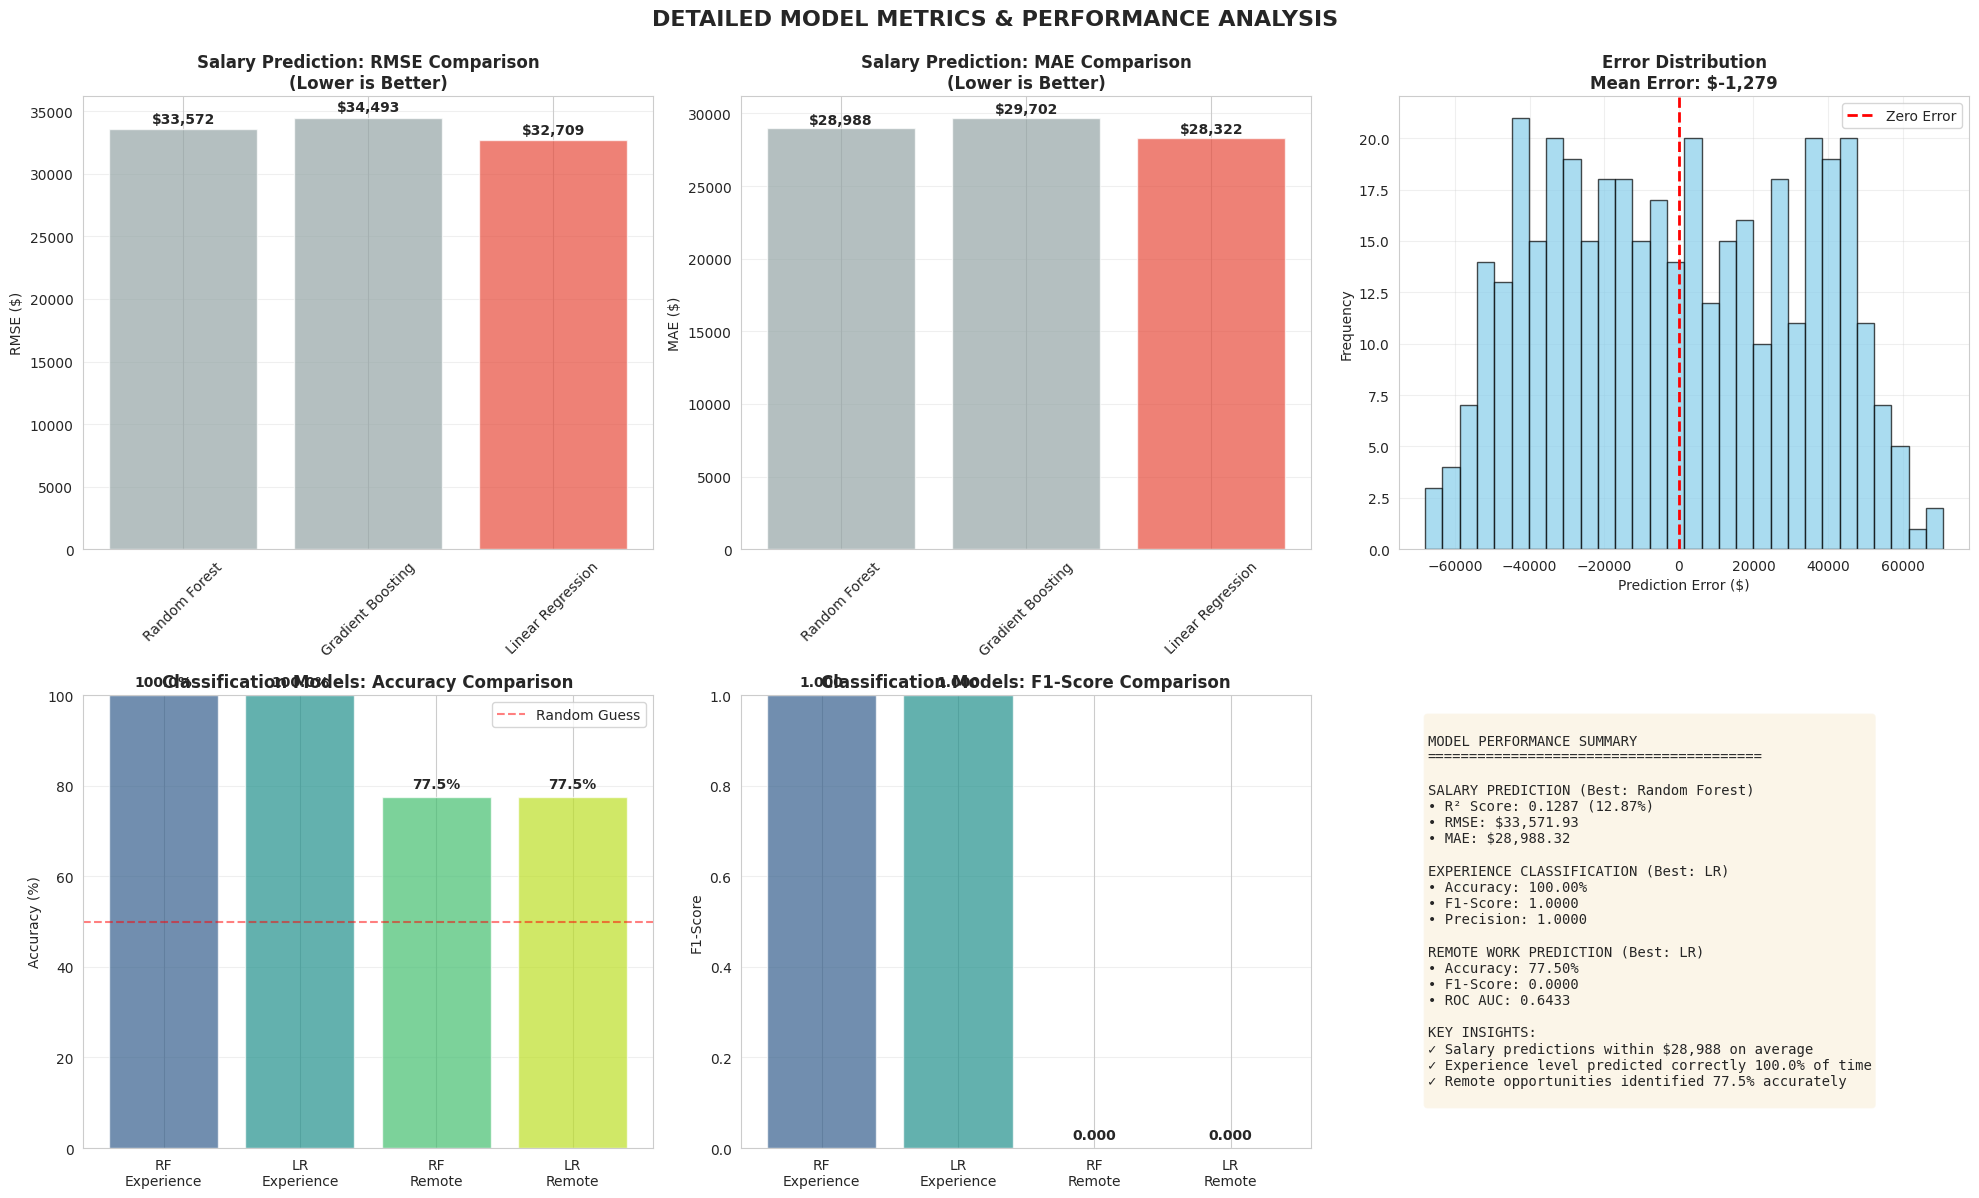

In [ ]:
# VISUALIZATION 2: Detailed Model Metrics
# ============================================
print("\nCreating detailed metrics visualization...")

fig, axes = plt.subplots(2, 3, figsize=(20, 12))

# 1. RMSE Comparison for Regression Models
ax1 = axes[0, 0]
rmse_values = [rf_rmse, gb_rmse, lr_rmse]
model_names = ['Random Forest', 'Gradient Boosting', 'Linear Regression']
colors_rmse = ['#e74c3c' if val == min(rmse_values) else '#95a5a6' for val in rmse_values]
bars = ax1.bar(model_names, rmse_values, color=colors_rmse, alpha=0.7)
ax1.set_ylabel('RMSE ($)')
ax1.set_title('Salary Prediction: RMSE Comparison\n(Lower is Better)', fontweight='bold')
ax1.tick_params(axis='x', rotation=45)
for i, (bar, val) in enumerate(zip(bars, rmse_values)):
    ax1.text(i, val + 500, f'${val:,.0f}', ha='center', fontweight='bold')
ax1.grid(axis='y', alpha=0.3)

# 2. MAE Comparison for Regression Models
ax2 = axes[0, 1]
mae_values = [rf_mae, gb_mae, lr_mae]
colors_mae = ['#e74c3c' if val == min(mae_values) else '#95a5a6' for val in mae_values]
bars = ax2.bar(model_names, mae_values, color=colors_mae, alpha=0.7)
ax2.set_ylabel('MAE ($)')
ax2.set_title('Salary Prediction: MAE Comparison\n(Lower is Better)', fontweight='bold')
ax2.tick_params(axis='x', rotation=45)
for i, (bar, val) in enumerate(zip(bars, mae_values)):
    ax2.text(i, val + 300, f'${val:,.0f}', ha='center', fontweight='bold')
ax2.grid(axis='y', alpha=0.3)

# 3. Salary Prediction Error Distribution
ax3 = axes[0, 2]
errors = y_test_sal - y_pred_rf
ax3.hist(errors, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
ax3.axvline(x=0, color='red', linestyle='--', linewidth=2, label='Zero Error')
ax3.set_xlabel('Prediction Error ($)')
ax3.set_ylabel('Frequency')
ax3.set_title(f'Error Distribution\nMean Error: ${errors.mean():,.0f}', fontweight='bold')
ax3.legend()
ax3.grid(alpha=0.3)

# 4. Classification Accuracy Comparison
ax4 = axes[1, 0]
class_models = ['RF\nExperience', 'LR\nExperience', 'RF\nRemote', 'LR\nRemote']
class_acc = [rf_exp_accuracy*100, log_exp_accuracy*100,
             rf_rem_accuracy*100, log_rem_accuracy*100]
colors_acc = plt.cm.viridis(np.linspace(0.3, 0.9, len(class_acc)))
bars = ax4.bar(class_models, class_acc, color=colors_acc, alpha=0.7)
ax4.set_ylabel('Accuracy (%)')
ax4.set_title('Classification Models: Accuracy Comparison', fontweight='bold')
ax4.set_ylim([0, 100])
for i, (bar, val) in enumerate(zip(bars, class_acc)):
    ax4.text(i, val + 2, f'{val:.1f}%', ha='center', fontweight='bold')
ax4.axhline(y=50, color='red', linestyle='--', alpha=0.5, label='Random Guess')
ax4.legend()
ax4.grid(axis='y', alpha=0.3)

# 5. F1-Score Comparison
ax5 = axes[1, 1]
f1_scores = [rf_exp_f1, log_exp_f1, rf_rem_f1, log_rem_f1]
bars = ax5.bar(class_models, f1_scores, color=colors_acc, alpha=0.7)
ax5.set_ylabel('F1-Score')
ax5.set_title('Classification Models: F1-Score Comparison', fontweight='bold')
ax5.set_ylim([0, 1])
for i, (bar, val) in enumerate(zip(bars, f1_scores)):
    ax5.text(i, val + 0.02, f'{val:.3f}', ha='center', fontweight='bold')
ax5.grid(axis='y', alpha=0.3)

# 6. Model Performance Summary (Table-like)
ax6 = axes[1, 2]
ax6.axis('off')
summary_text = f"""
MODEL PERFORMANCE SUMMARY
{'='*40}

SALARY PREDICTION (Best: Random Forest)
• R² Score: {rf_r2:.4f} ({rf_r2*100:.2f}%)
• RMSE: ${rf_rmse:,.2f}
• MAE: ${rf_mae:,.2f}

EXPERIENCE CLASSIFICATION (Best: {'RF' if rf_exp_accuracy > log_exp_accuracy else 'LR'})
• Accuracy: {max(rf_exp_accuracy, log_exp_accuracy)*100:.2f}%
• F1-Score: {max(rf_exp_f1, log_exp_f1):.4f}
• Precision: {max(rf_exp_precision, log_exp_precision):.4f}

REMOTE WORK PREDICTION (Best: {'RF' if rf_rem_accuracy > log_rem_accuracy else 'LR'})
• Accuracy: {max(rf_rem_accuracy, log_rem_accuracy)*100:.2f}%
• F1-Score: {max(rf_rem_f1, log_rem_f1):.4f}
• ROC AUC: {max(rf_rem_auc, log_rem_auc):.4f}

KEY INSIGHTS:
✓ Salary predictions within ${rf_mae:,.0f} on average
✓ Experience level predicted correctly {rf_exp_accuracy*100:.1f}% of time
✓ Remote opportunities identified {rf_rem_accuracy*100:.1f}% accurately
"""
ax6.text(0.05, 0.95, summary_text, transform=ax6.transAxes,
         fontsize=10, verticalalignment='top', fontfamily='monospace',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.3))

plt.suptitle('DETAILED MODEL METRICS & PERFORMANCE ANALYSIS',
             fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.savefig('ml_detailed_metrics.png', dpi=300, bbox_inches='tight')
print("✅ Saved: ml_detailed_metrics.png")
plt.show()


Creating advanced ML visualizations...
✅ Saved: ml_advanced_analysis.png


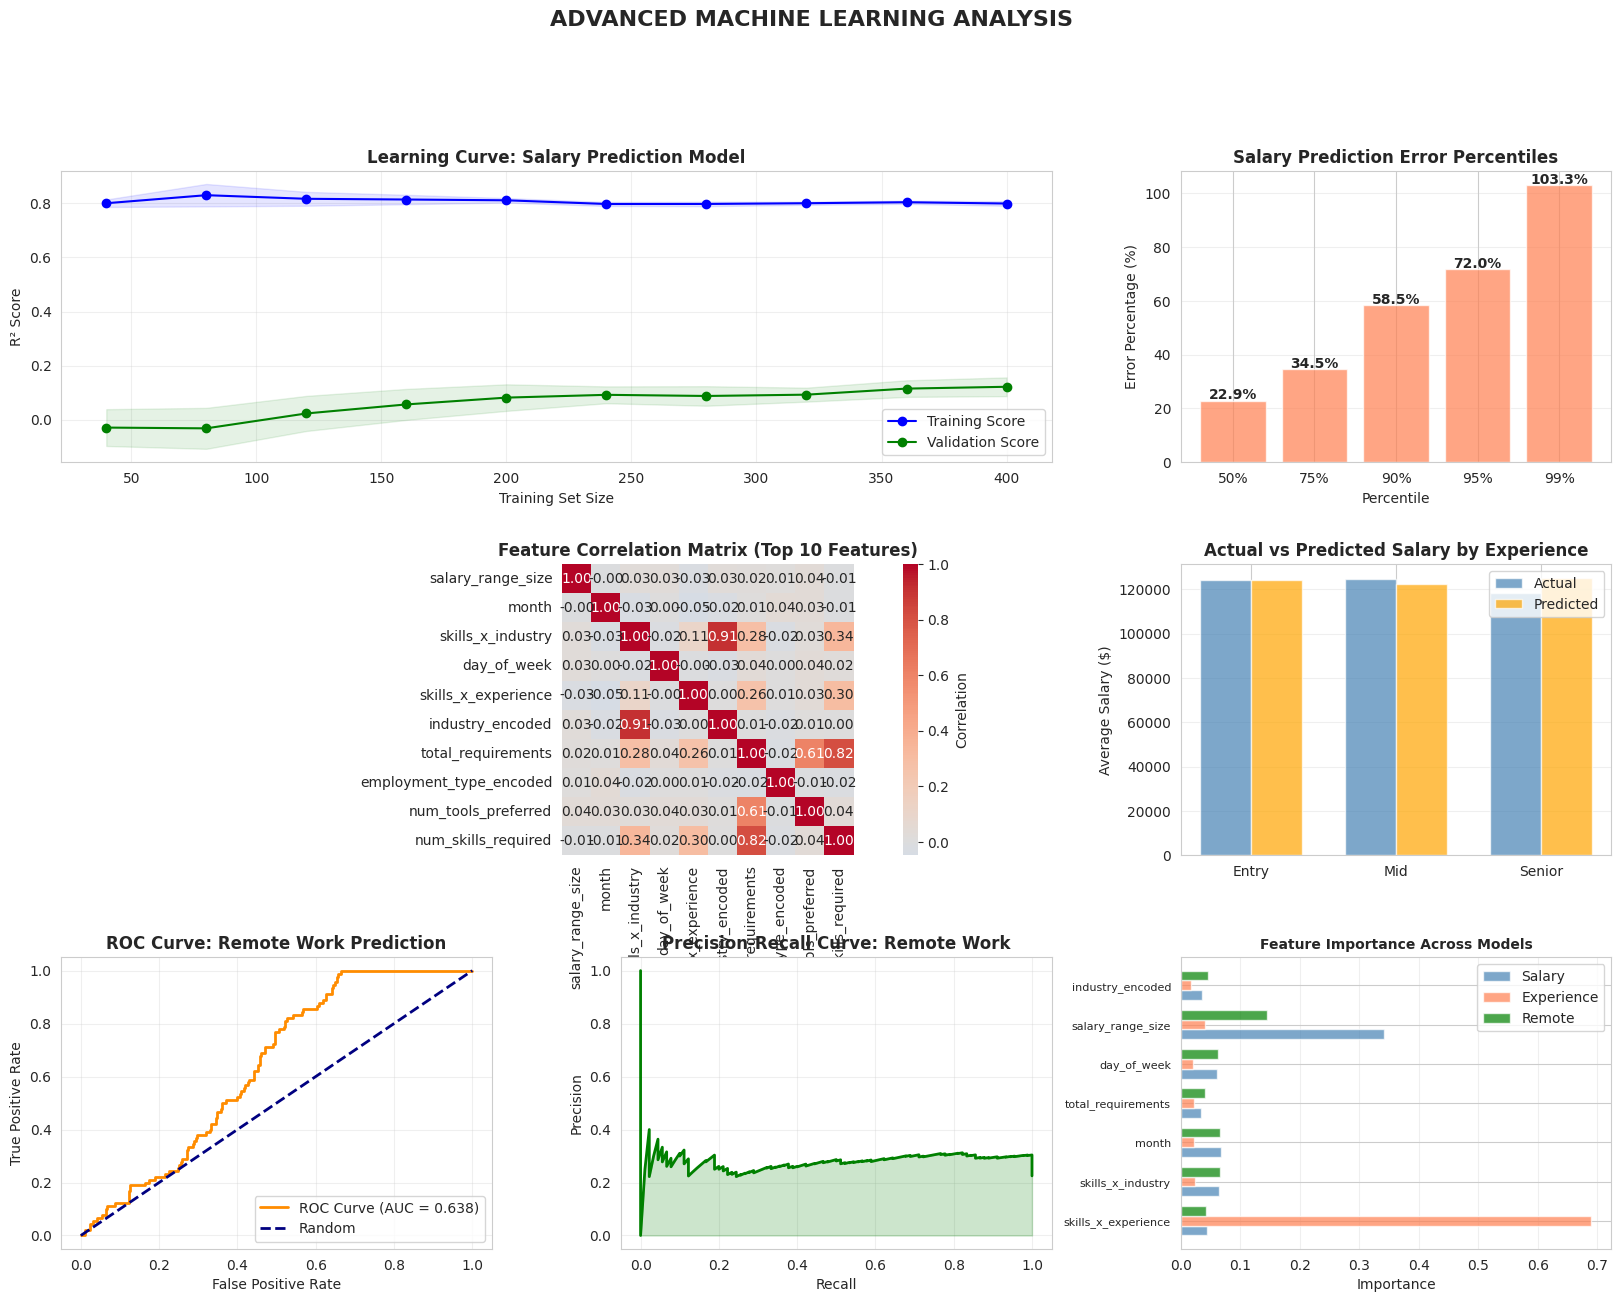

In [ ]:
# ============================================
# STEP 9: ADVANCED ML VISUALIZATIONS
# ============================================

print("\nCreating advanced ML visualizations...")

fig = plt.figure(figsize=(20, 14))
gs = fig.add_gridspec(3, 3, hspace=0.35, wspace=0.3)

# 1. Learning Curve (Salary Prediction)
from sklearn.model_selection import learning_curve

ax1 = fig.add_subplot(gs[0, :2])
train_sizes, train_scores, val_scores = learning_curve(
    rf_regressor, X_train_sal[:500], y_train_sal[:500],
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5, scoring='r2', n_jobs=-1
)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

ax1.plot(train_sizes, train_mean, 'o-', color='blue', label='Training Score')
ax1.fill_between(train_sizes, train_mean - train_std, train_mean + train_std,
                  alpha=0.1, color='blue')
ax1.plot(train_sizes, val_mean, 'o-', color='green', label='Validation Score')
ax1.fill_between(train_sizes, val_mean - val_std, val_mean + val_std,
                  alpha=0.1, color='green')
ax1.set_xlabel('Training Set Size')
ax1.set_ylabel('R² Score')
ax1.set_title('Learning Curve: Salary Prediction Model', fontweight='bold', fontsize=12)
ax1.legend(loc='best')
ax1.grid(alpha=0.3)

# 2. Prediction Error Percentiles
ax2 = fig.add_subplot(gs[0, 2])
error_percentages = np.abs((y_test_sal - y_pred_rf) / y_test_sal * 100)
percentiles = [50, 75, 90, 95, 99]
percentile_values = [np.percentile(error_percentages, p) for p in percentiles]
ax2.bar([str(p) + '%' for p in percentiles], percentile_values,
        color='coral', alpha=0.7)
ax2.set_ylabel('Error Percentage (%)')
ax2.set_xlabel('Percentile')
ax2.set_title('Salary Prediction Error Percentiles', fontweight='bold')
for i, val in enumerate(percentile_values):
    ax2.text(i, val + 0.5, f'{val:.1f}%', ha='center', fontweight='bold')
ax2.grid(axis='y', alpha=0.3)

# 3. Feature Correlation Heatmap (Top Features)
ax3 = fig.add_subplot(gs[1, :2])
top_10_features = feature_importance_sal.head(10)['Feature'].tolist()
corr_matrix = X_salary[top_10_features].corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, ax=ax3, cbar_kws={'label': 'Correlation'})
ax3.set_title('Feature Correlation Matrix (Top 10 Features)', fontweight='bold', fontsize=12)

# 4. Salary Prediction by Experience Level
ax4 = fig.add_subplot(gs[1, 2])
test_data_exp = pd.DataFrame({
    'Actual': y_test_sal.values,
    'Predicted': y_pred_rf,
    'Experience': df_ml.loc[y_test_sal.index, 'experience_level'].values
})
exp_levels = sorted(test_data_exp['Experience'].unique())
positions = np.arange(len(exp_levels))
actual_means = [test_data_exp[test_data_exp['Experience'] == exp]['Actual'].mean()
                for exp in exp_levels]
pred_means = [test_data_exp[test_data_exp['Experience'] == exp]['Predicted'].mean()
              for exp in exp_levels]
width = 0.35
ax4.bar(positions - width/2, actual_means, width, label='Actual', color='steelblue', alpha=0.7)
ax4.bar(positions + width/2, pred_means, width, label='Predicted', color='orange', alpha=0.7)
ax4.set_xticks(positions)
ax4.set_xticklabels(exp_levels)
ax4.set_ylabel('Average Salary ($)')
ax4.set_title('Actual vs Predicted Salary by Experience', fontweight='bold')
ax4.legend()
ax4.grid(axis='y', alpha=0.3)

# 5. ROC Curve for Remote Work Prediction
ax5 = fig.add_subplot(gs[2, 0])
if rf_rem_auc > 0:
    fpr, tpr, thresholds = roc_curve(y_test_rem, y_pred_rf_rem_proba)
    ax5.plot(fpr, tpr, color='darkorange', lw=2,
             label=f'ROC Curve (AUC = {rf_rem_auc:.3f})')
    ax5.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
    ax5.set_xlabel('False Positive Rate')
    ax5.set_ylabel('True Positive Rate')
    ax5.set_title('ROC Curve: Remote Work Prediction', fontweight='bold')
    ax5.legend(loc='lower right')
    ax5.grid(alpha=0.3)
else:
    ax5.text(0.5, 0.5, 'ROC Curve\nUnavailable', ha='center', va='center',
             fontsize=14, transform=ax5.transAxes)
    ax5.set_title('ROC Curve: Remote Work Prediction', fontweight='bold')

# 6. Precision-Recall Curve
ax6 = fig.add_subplot(gs[2, 1])
from sklearn.metrics import precision_recall_curve
precision, recall, _ = precision_recall_curve(y_test_rem, y_pred_rf_rem_proba)
ax6.plot(recall, precision, color='green', lw=2)
ax6.fill_between(recall, precision, alpha=0.2, color='green')
ax6.set_xlabel('Recall')
ax6.set_ylabel('Precision')
ax6.set_title('Precision-Recall Curve: Remote Work', fontweight='bold')
ax6.grid(alpha=0.3)

# 7. Feature Importance Comparison Across Models
ax7 = fig.add_subplot(gs[2, 2])
# Get top 8 features from each model
top_sal = set(feature_importance_sal.head(8)['Feature'])
top_exp = set(feature_importance_exp.head(8)['Feature'])
top_rem = set(feature_importance_rem.head(8)['Feature'])

common_features = list(top_sal & top_exp & top_rem)
if len(common_features) < 5:
    common_features = list((top_sal | top_exp | top_rem))[:8]

if common_features:
    sal_imp = [feature_importance_sal[feature_importance_sal['Feature'] == f]['Importance'].values[0]
               if f in feature_importance_sal['Feature'].values else 0 for f in common_features]
    exp_imp = [feature_importance_exp[feature_importance_exp['Feature'] == f]['Importance'].values[0]
               if f in feature_importance_exp['Feature'].values else 0 for f in common_features]
    rem_imp = [feature_importance_rem[feature_importance_rem['Feature'] == f]['Importance'].values[0]
               if f in feature_importance_rem['Feature'].values else 0 for f in common_features]

    x = np.arange(len(common_features))
    width = 0.25
    ax7.barh(x - width, sal_imp, width, label='Salary', color='steelblue', alpha=0.7)
    ax7.barh(x, exp_imp, width, label='Experience', color='coral', alpha=0.7)
    ax7.barh(x + width, rem_imp, width, label='Remote', color='green', alpha=0.7)
    ax7.set_yticks(x)
    ax7.set_yticklabels([f[:20] for f in common_features], fontsize=8)
    ax7.set_xlabel('Importance')
    ax7.set_title('Feature Importance Across Models', fontweight='bold', fontsize=10)
    ax7.legend()
    ax7.grid(axis='x', alpha=0.3)

plt.suptitle('ADVANCED MACHINE LEARNING ANALYSIS',
             fontsize=16, fontweight='bold', y=0.995)
plt.savefig('ml_advanced_analysis.png', dpi=300, bbox_inches='tight')
print("✅ Saved: ml_advanced_analysis.png")
plt.show()

In [ ]:
# ============================================
# STEP 10: INTERACTIVE ML VISUALIZATIONS (PLOTLY)
# ============================================

print("\nCreating interactive ML visualizations...")

# 1. Interactive 3D Scatter: Actual vs Predicted vs Features
fig1 = go.Figure()

# Add actual values
fig1.add_trace(go.Scatter3d(
    x=df_ml.loc[y_test_sal.index, 'num_skills_required'],
    y=df_ml.loc[y_test_sal.index, 'experience_encoded'],
    z=y_test_sal,
    mode='markers',
    name='Actual Salary',
    marker=dict(size=5, color='blue', opacity=0.6),
    text=[f'Actual: ${val:,.0f}' for val in y_test_sal]
))

# Add predicted values
fig1.add_trace(go.Scatter3d(
    x=df_ml.loc[y_test_sal.index, 'num_skills_required'],
    y=df_ml.loc[y_test_sal.index, 'experience_encoded'],
    z=y_pred_rf,
    mode='markers',
    name='Predicted Salary',
    marker=dict(size=5, color='red', opacity=0.6),
    text=[f'Predicted: ${val:,.0f}' for val in y_pred_rf]
))

fig1.update_layout(
    title='3D View: Salary Prediction Analysis',
    scene=dict(
        xaxis_title='Number of Skills Required',
        yaxis_title='Experience Level (Encoded)',
        zaxis_title='Salary ($)'
    ),
    height=700
)
fig1.write_html('ml_interactive_3d_salary.html')
print("✅ Saved: ml_interactive_3d_salary.html")
fig1.show()

# 2. Interactive Feature Importance Comparison
fig2 = go.Figure()

top_n = 15
top_sal_df = feature_importance_sal.head(top_n)
top_exp_df = feature_importance_exp.head(top_n)

fig2.add_trace(go.Bar(
    y=top_sal_df['Feature'],
    x=top_sal_df['Importance'],
    name='Salary Model',
    orientation='h',
    marker=dict(color='steelblue')
))

fig2.add_trace(go.Bar(
    y=top_exp_df['Feature'],
    x=top_exp_df['Importance'],
    name='Experience Model',
    orientation='h',
    marker=dict(color='coral')
))

fig2.update_layout(
    title='Interactive Feature Importance Comparison',
    xaxis_title='Importance Score',
    yaxis_title='Feature',
    height=600,
    barmode='group',
    hovermode='y unified'
)
fig2.write_html('ml_interactive_feature_importance.html')
print("✅ Saved: ml_interactive_feature_importance.html")
fig2.show()

# 3. Interactive Model Performance Dashboard
fig3 = make_subplots(
    rows=2, cols=2,
    subplot_titles=('R² Scores Comparison', 'Classification Accuracy',
                    'Regression RMSE', 'F1-Scores'),
    specs=[[{'type': 'bar'}, {'type': 'bar'}],
           [{'type': 'bar'}, {'type': 'bar'}]]
)

# R² Scores
fig3.add_trace(
    go.Bar(x=['Random Forest', 'Gradient Boosting', 'Linear Regression'],
           y=[rf_r2, gb_r2, lr_r2],
           name='R² Score',
           marker=dict(color=['green' if v == max([rf_r2, gb_r2, lr_r2]) else 'lightblue'
                              for v in [rf_r2, gb_r2, lr_r2]]),
           text=[f'{v:.4f}' for v in [rf_r2, gb_r2, lr_r2]],
           textposition='outside'),
    row=1, col=1
)

# Classification Accuracy
fig3.add_trace(
    go.Bar(x=['RF Experience', 'LR Experience', 'RF Remote', 'LR Remote'],
           y=[rf_exp_accuracy*100, log_exp_accuracy*100,
              rf_rem_accuracy*100, log_rem_accuracy*100],
           name='Accuracy %',
           marker=dict(color='coral'),
           text=[f'{v:.1f}%' for v in [rf_exp_accuracy*100, log_exp_accuracy*100,
                                       rf_rem_accuracy*100, log_rem_accuracy*100]],
           textposition='outside'),
    row=1, col=2
)

# RMSE
fig3.add_trace(
    go.Bar(x=['Random Forest', 'Gradient Boosting', 'Linear Regression'],
           y=[rf_rmse, gb_rmse, lr_rmse],
           name='RMSE',
           marker=dict(color=['red' if v == min([rf_rmse, gb_rmse, lr_rmse]) else 'lightgray'
                              for v in [rf_rmse, gb_rmse, lr_rmse]]),
           text=[f'${v:,.0f}' for v in [rf_rmse, gb_rmse, lr_rmse]],
           textposition='outside'),
    row=2, col=1
)

# F1-Scores
fig3.add_trace(
    go.Bar(x=['RF Experience', 'LR Experience', 'RF Remote', 'LR Remote'],
           y=[rf_exp_f1, log_exp_f1, rf_rem_f1, log_rem_f1],
           name='F1-Score',
           marker=dict(color='purple'),
           text=[f'{v:.3f}' for v in [rf_exp_f1, log_exp_f1, rf_rem_f1, log_rem_f1]],
           textposition='outside'),
    row=2, col=2
)

fig3.update_layout(
    title_text='Interactive ML Model Performance Dashboard',
    showlegend=False,
    height=800
)
fig3.write_html('ml_interactive_performance.html')
print("✅ Saved: ml_interactive_performance.html")
fig3.show()


Creating interactive ML visualizations...
✅ Saved: ml_interactive_3d_salary.html


✅ Saved: ml_interactive_feature_importance.html


✅ Saved: ml_interactive_performance.html
